# MUSKAN GUPTA        1805497        HOUSE GOLLUM

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('1805497.csv')
df1=pd.DataFrame(data)
df1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2019-04-29 00:00:00,2019.0,1.929108e+09,2019-04-11,20190408,20190411,20190426.0,USD,RV,1.0,NaN,24794.06,20190411.0,NAH4,1.929108e+09,0
1,U001,0200759878,SA systems,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,13891.01,20181230.0,NAH4,1.928540e+09,0
2,U001,0200769623,WAL-MAR us,2019-10-03 00:00:00,2019.0,1.929910e+09,2019-09-23,20190923,20190923,20191008.0,USD,RV,1.0,NaN,65305.25,20190923.0,NAH4,1.929910e+09,0
3,U001,0200126819,MCLANE corporation,2019-04-22 00:00:00,2019.0,1.929097e+09,2019-04-08,20190406,20190408,20190423.0,USD,RV,1.0,NaN,37882.59,20190408.0,NAA8,1.929097e+09,0
4,U001,0200794332,COST llc,2019-02-11 00:00:00,2019.0,1.928670e+09,2019-01-25,20190123,20190125,20190209.0,USD,RV,1.0,NaN,16330.80,20190125.0,NAAX,1.928670e+09,0


In [3]:
df1.shape

(50000, 19)

In [4]:
#for knowing the type of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46110 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

# Converting dates to date& time format and finding target variable

In [5]:
df1['clear_date'] = pd.to_datetime(df1['clear_date'])
df1['due_in_date'] = pd.to_datetime(df1['due_in_date'],format='%Y%m%d')
df1['target']=(df1['clear_date']-df1['due_in_date']).dt.days

df1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target
0,U001,0200769623,WAL-MAR systems,2019-04-29,2019.0,1.929108e+09,2019-04-11,20190408,20190411,2019-04-26,USD,RV,1.0,NaN,24794.06,20190411.0,NAH4,1.929108e+09,0,3.0
1,U001,0200759878,SA systems,2019-01-15,2019.0,1.928540e+09,2018-12-30,20181229,20181230,2019-01-14,USD,RV,1.0,NaN,13891.01,20181230.0,NAH4,1.928540e+09,0,1.0
2,U001,0200769623,WAL-MAR us,2019-10-03,2019.0,1.929910e+09,2019-09-23,20190923,20190923,2019-10-08,USD,RV,1.0,NaN,65305.25,20190923.0,NAH4,1.929910e+09,0,-5.0
3,U001,0200126819,MCLANE corporation,2019-04-22,2019.0,1.929097e+09,2019-04-08,20190406,20190408,2019-04-23,USD,RV,1.0,NaN,37882.59,20190408.0,NAA8,1.929097e+09,0,-1.0
4,U001,0200794332,COST llc,2019-02-11,2019.0,1.928670e+09,2019-01-25,20190123,20190125,2019-02-09,USD,RV,1.0,NaN,16330.80,20190125.0,NAAX,1.928670e+09,0,2.0


In [6]:
df1['document_create_date'] = pd.to_datetime(df1['document_create_date'],format='%Y%m%d')
df1['document_create_date.1'] = pd.to_datetime(df1['document_create_date.1'],format='%Y%m%d')
df1['baseline_create_date'] = pd.to_datetime(df1['baseline_create_date'],format='%Y%m%d')
df1['document_create_date.1'] = pd.to_datetime(df1['document_create_date.1'],format='%Y%m%d')



# #Removing anomalies 
#(rows that don't satisfy the condition doc_create_date1 <= posting date <= baselines date
#<= due date or clear date)

In [7]:
df1= df1.loc[(df1['document_create_date.1']<=df1['posting_date']) & 
              (df1['posting_date']<=df1['baseline_create_date'])& 
              (df1['baseline_create_date']<=df1['due_in_date']),:]

In [8]:
df1.shape

(47741, 20)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47741 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           47741 non-null  object        
 1   cust_number             47741 non-null  object        
 2   name_customer           47741 non-null  object        
 3   clear_date              44006 non-null  datetime64[ns]
 4   buisness_year           47741 non-null  float64       
 5   doc_id                  47741 non-null  float64       
 6   posting_date            47741 non-null  object        
 7   document_create_date    47741 non-null  datetime64[ns]
 8   document_create_date.1  47741 non-null  datetime64[ns]
 9   due_in_date             47741 non-null  datetime64[ns]
 10  invoice_currency        47741 non-null  object        
 11  document type           47741 non-null  object        
 12  posting_id              47741 non-null  float6

In [10]:
df=df1[(df1['clear_date']!='NaN') & (df1['isOpen']==0)]
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target
0,U001,0200769623,WAL-MAR systems,2019-04-29,2019.0,1.929108e+09,2019-04-11,2019-04-08,2019-04-11,2019-04-26,USD,RV,1.0,NaN,24794.06,2019-04-11,NAH4,1.929108e+09,0,3.0
1,U001,0200759878,SA systems,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,13891.01,2018-12-30,NAH4,1.928540e+09,0,1.0
2,U001,0200769623,WAL-MAR us,2019-10-03,2019.0,1.929910e+09,2019-09-23,2019-09-23,2019-09-23,2019-10-08,USD,RV,1.0,NaN,65305.25,2019-09-23,NAH4,1.929910e+09,0,-5.0
3,U001,0200126819,MCLANE corporation,2019-04-22,2019.0,1.929097e+09,2019-04-08,2019-04-06,2019-04-08,2019-04-23,USD,RV,1.0,NaN,37882.59,2019-04-08,NAA8,1.929097e+09,0,-1.0
4,U001,0200794332,COST llc,2019-02-11,2019.0,1.928670e+09,2019-01-25,2019-01-23,2019-01-25,2019-02-09,USD,RV,1.0,NaN,16330.80,2019-01-25,NAAX,1.928670e+09,0,2.0


In [11]:
df2=df1[(df1['isOpen']==1)]
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target
46110,U001,0100031704,DELHAIZE in,NaT,2020.0,1.930688e+09,2020-03-24,2020-03-23,2020-03-24,2020-04-08,USD,RV,1.0,NaN,100751.33,2020-03-24,NAA8,1.930688e+09,1,NaN
46111,U001,200761734,H E BUT trust,NaT,2020.0,1.930862e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,USD,RV,1.0,NaN,70195.51,2020-05-07,NAA8,1.930862e+09,1,NaN
46112,U001,0200707822,PUBLI in,NaT,2020.0,1.930809e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,USD,RV,1.0,NaN,53066.38,2020-04-21,NAA8,1.930809e+09,1,NaN
46113,U001,0200722444,PERFOR in,NaT,2020.0,1.930581e+09,2020-03-05,2020-03-02,2020-03-05,2020-04-06,USD,RV,1.0,NaN,29480.64,2020-03-05,NA32,1.930581e+09,1,NaN
46114,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930827e+09,2020-04-28,2020-04-25,2020-04-28,2020-05-13,USD,RV,1.0,NaN,115.52,2020-04-28,NAH4,1.930827e+09,1,NaN


In [12]:
df['target']=df['target'].astype(int)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target
0,U001,0200769623,WAL-MAR systems,2019-04-29,2019.0,1.929108e+09,2019-04-11,2019-04-08,2019-04-11,2019-04-26,USD,RV,1.0,NaN,24794.06,2019-04-11,NAH4,1.929108e+09,0,3
1,U001,0200759878,SA systems,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,13891.01,2018-12-30,NAH4,1.928540e+09,0,1
2,U001,0200769623,WAL-MAR us,2019-10-03,2019.0,1.929910e+09,2019-09-23,2019-09-23,2019-09-23,2019-10-08,USD,RV,1.0,NaN,65305.25,2019-09-23,NAH4,1.929910e+09,0,-5
3,U001,0200126819,MCLANE corporation,2019-04-22,2019.0,1.929097e+09,2019-04-08,2019-04-06,2019-04-08,2019-04-23,USD,RV,1.0,NaN,37882.59,2019-04-08,NAA8,1.929097e+09,0,-1
4,U001,0200794332,COST llc,2019-02-11,2019.0,1.928670e+09,2019-01-25,2019-01-23,2019-01-25,2019-02-09,USD,RV,1.0,NaN,16330.80,2019-01-25,NAAX,1.928670e+09,0,2


In [14]:
df.shape

(44006, 20)

# Splitting data into train test split

In [15]:
df=df.sort_values(by = 'document_create_date.1') 

In [16]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target
42519,U001,0200315290,KWI,2019-01-10,2019.0,1.928499e+09,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,RV,1.0,NaN,15133.15,2018-12-30,NAA8,1.928499e+09,0,-4
27742,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,39118.11,2018-12-30,NAH4,1.928538e+09,0,-5
14292,U001,0200769623,WAL-MAR llc,2019-01-11,2019.0,1.928542e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,10357.32,2018-12-30,NAH4,1.928542e+09,0,-3
19329,U001,0200769623,WAL-MAR,2019-01-14,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,16833.29,2018-12-30,NAH4,1.928543e+09,0,0
9123,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,756.28,2018-12-30,NAH4,1.928541e+09,0,-5


In [17]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,Y , test_size=0.3,shuffle=False)
X_val1, X_val2, y_val1, y_val2 = train_test_split(X_val,y_val,test_size=0.5,shuffle=False)

In [19]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
42519,U001,0200315290,KWI,2019-01-10,2019.0,1.928499e+09,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,RV,1.0,NaN,15133.15,2018-12-30,NAA8,1.928499e+09,0
27742,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,39118.11,2018-12-30,NAH4,1.928538e+09,0
14292,U001,0200769623,WAL-MAR llc,2019-01-11,2019.0,1.928542e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,10357.32,2018-12-30,NAH4,1.928542e+09,0
19329,U001,0200769623,WAL-MAR,2019-01-14,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,16833.29,2018-12-30,NAH4,1.928543e+09,0
9123,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,756.28,2018-12-30,NAH4,1.928541e+09,0


In [20]:
y_train.head()

42519   -4
27742   -5
14292   -3
19329    0
9123    -5
Name: target, dtype: int32

In [21]:
X_val1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
19200,U001,0200729828,KENNETH foundation,2019-10-30,2019.0,1.929965e+09,2019-10-07,2019-10-04,2019-10-07,2019-10-22,USD,RV,1.0,NaN,57057.23,2019-10-07,NAA8,1.929965e+09,0
15699,U001,0200726979,BJ'S,2019-10-22,2019.0,1.929951e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-22,USD,RV,1.0,NaN,294.63,2019-10-07,NAA8,1.929951e+09,0
24267,U001,0200794332,COST systems,2019-10-21,2019.0,1.929965e+09,2019-10-07,2019-10-04,2019-10-07,2019-10-22,USD,RV,1.0,NaN,8615.06,2019-10-07,NAAX,1.929965e+09,0
6506,U001,0200726979,BJ'S foundation,2019-10-22,2019.0,1.929976e+09,2019-10-07,2019-10-06,2019-10-07,2019-10-22,USD,RV,1.0,NaN,262.85,2019-10-07,NAA8,1.929976e+09,0
45711,U001,0200875680,MINERS corporation,2019-10-11,2019.0,1.929972e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-22,USD,RV,1.0,NaN,43785.70,2019-10-07,NAA8,1.929972e+09,0


In [22]:
X_train.shape

(30804, 19)

In [23]:
#checking for null values
X_train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             30804
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [24]:
X_train.nunique()

business_code                 6
cust_number                1256
name_customer              3541
clear_date                  283
buisness_year                 1
doc_id                    30804
posting_date                282
document_create_date        288
document_create_date.1      282
due_in_date                 346
invoice_currency              2
document type                 1
posting_id                    1
area_business                 0
total_open_amount         28142
baseline_create_date        291
cust_payment_terms           65
invoice_id                30804
isOpen                        1
dtype: int64

# Data preprocessing

# dropping columns having all same values,null values or different values

In [25]:
X_train.drop(columns=['area_business','posting_id','doc_id'], axis=1, inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# filling missing values

In [26]:
X_train['invoice_id'].fillna(float(X_train['invoice_id'].mode().values[0]),inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [27]:
X_train.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

In [28]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
42519,U001,0200315290,KWI,2019-01-10,2019.0,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,RV,15133.15,2018-12-30,NAA8,1.928499e+09,0
27742,U001,0200769623,WAL-MAR,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,39118.11,2018-12-30,NAH4,1.928538e+09,0
14292,U001,0200769623,WAL-MAR llc,2019-01-11,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,10357.32,2018-12-30,NAH4,1.928542e+09,0
19329,U001,0200769623,WAL-MAR,2019-01-14,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,16833.29,2018-12-30,NAH4,1.928543e+09,0
9123,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,756.28,2018-12-30,NAH4,1.928541e+09,0


# dropping rows exactly same

In [29]:

X_train.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
X_train.shape

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(30804, 16)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30804 entries, 42519 to 28665
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           30804 non-null  object        
 1   cust_number             30804 non-null  object        
 2   name_customer           30804 non-null  object        
 3   clear_date              30804 non-null  datetime64[ns]
 4   buisness_year           30804 non-null  float64       
 5   posting_date            30804 non-null  object        
 6   document_create_date    30804 non-null  datetime64[ns]
 7   document_create_date.1  30804 non-null  datetime64[ns]
 8   due_in_date             30804 non-null  datetime64[ns]
 9   invoice_currency        30804 non-null  object        
 10  document type           30804 non-null  object        
 11  total_open_amount       30804 non-null  float64       
 12  baseline_create_date    30804 non-null  da

# EXPLORATORY DATA ANALYSIS(EDA)

<AxesSubplot:xlabel='business_code', ylabel='total_open_amount'>

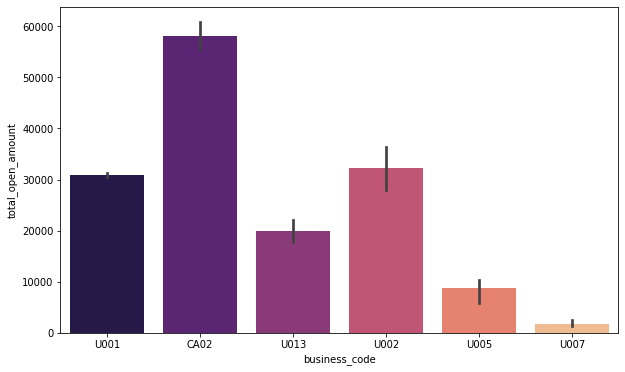

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='business_code',y='total_open_amount',data=X_train,palette='magma')
#from here we can intepret the total open amount with bussiness code

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30804 entries, 42519 to 28665
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           30804 non-null  object        
 1   cust_number             30804 non-null  object        
 2   name_customer           30804 non-null  object        
 3   clear_date              30804 non-null  datetime64[ns]
 4   buisness_year           30804 non-null  float64       
 5   posting_date            30804 non-null  object        
 6   document_create_date    30804 non-null  datetime64[ns]
 7   document_create_date.1  30804 non-null  datetime64[ns]
 8   due_in_date             30804 non-null  datetime64[ns]
 9   invoice_currency        30804 non-null  object        
 10  document type           30804 non-null  object        
 11  total_open_amount       30804 non-null  float64       
 12  baseline_create_date    30804 non-null  da

(array([2.7059e+04, 3.2160e+03, 3.9000e+02, 9.4000e+01, 3.5000e+01,
        7.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([3.42000000e+00, 7.49077470e+04, 1.49812074e+05, 2.24716401e+05,
        2.99620728e+05, 3.74525055e+05, 4.49429382e+05, 5.24333709e+05,
        5.99238036e+05, 6.74142363e+05, 7.49046690e+05]),
 <BarContainer object of 10 artists>)

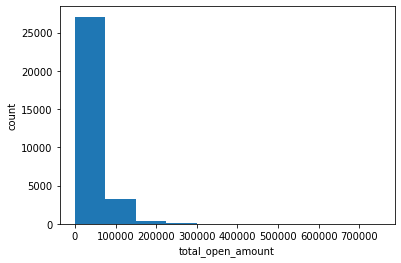

In [33]:
plt.xlabel("total_open_amount")
plt.ylabel("count")
plt.hist(X_train['total_open_amount'])

<AxesSubplot:xlabel='buisness_year', ylabel='total_open_amount'>

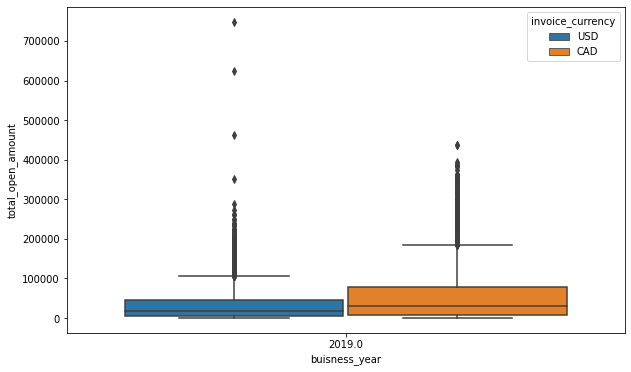

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=X_train,x='buisness_year',y='total_open_amount',hue='invoice_currency')

In [35]:
X_train['total_open_amount'].mean()

33038.835252564604

In [36]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
42519,U001,0200315290,KWI,2019-01-10,2019.0,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,RV,15133.15,2018-12-30,NAA8,1.928499e+09,0
27742,U001,0200769623,WAL-MAR,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,39118.11,2018-12-30,NAH4,1.928538e+09,0
14292,U001,0200769623,WAL-MAR llc,2019-01-11,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,10357.32,2018-12-30,NAH4,1.928542e+09,0
19329,U001,0200769623,WAL-MAR,2019-01-14,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,16833.29,2018-12-30,NAH4,1.928543e+09,0
9123,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,756.28,2018-12-30,NAH4,1.928541e+09,0


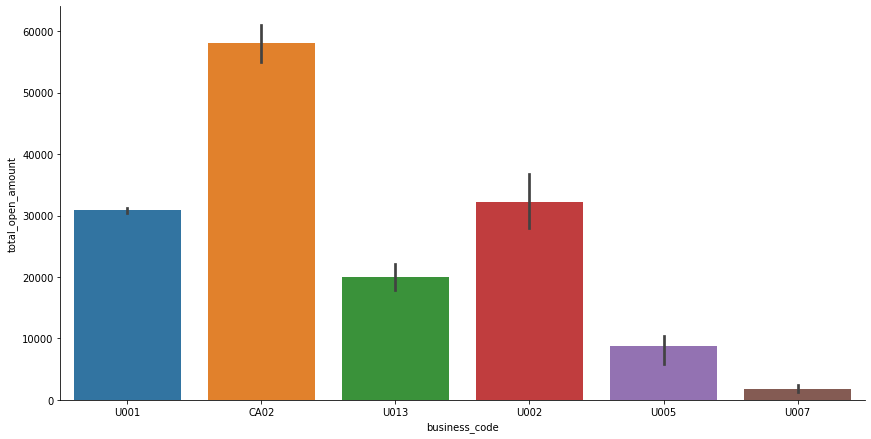

In [37]:
sns.catplot(x = 'business_code' , y = 'total_open_amount', kind='bar',data=X_train ,
            height = 6 , aspect = 2)
 

(array([2.7603e+04, 0.0000e+00, 2.6270e+03, 0.0000e+00, 4.5400e+02,
        0.0000e+00, 1.1000e+02, 0.0000e+00, 7.0000e+00, 3.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

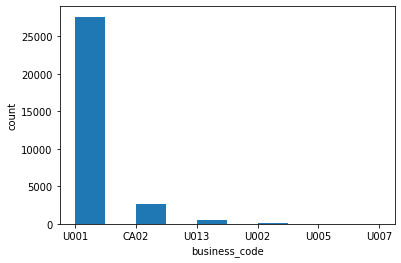

In [38]:
plt.xlabel("business_code")
plt.ylabel("count")
plt.hist(X_train['business_code'])

In [39]:
X_train.nunique()

business_code                 6
cust_number                1256
name_customer              3541
clear_date                  283
buisness_year                 1
posting_date                282
document_create_date        288
document_create_date.1      282
due_in_date                 346
invoice_currency              2
document type                 1
total_open_amount         28142
baseline_create_date        291
cust_payment_terms           65
invoice_id                30804
isOpen                        1
dtype: int64

(array([2264., 3615., 3902., 4078., 4384., 3935., 3948., 3752.,  812.,
         114.]),
 array([17899. , 17935.2, 17971.4, 18007.6, 18043.8, 18080. , 18116.2,
        18152.4, 18188.6, 18224.8, 18261. ]),
 <BarContainer object of 10 artists>)

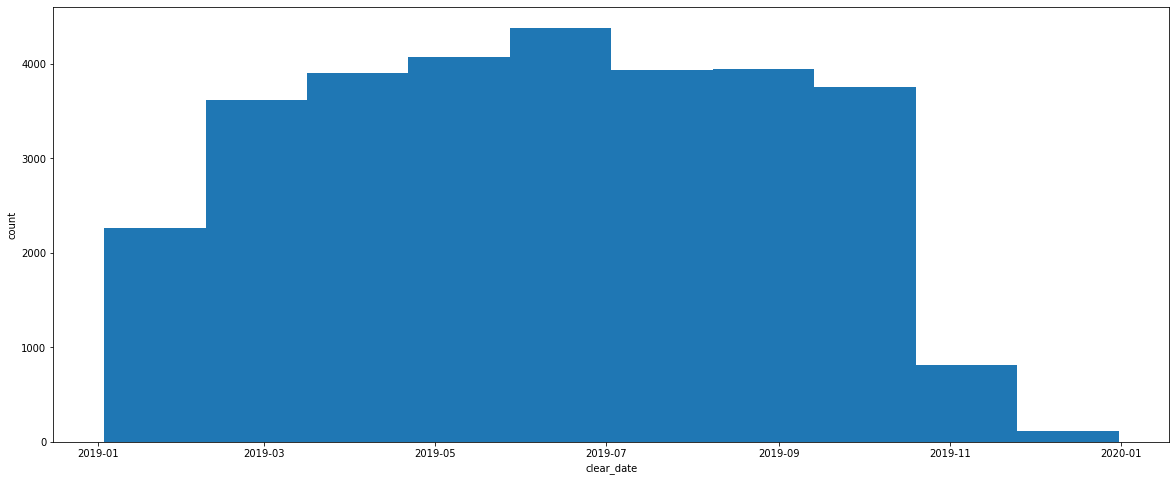

In [40]:
plt.figure(figsize=(20,8))
plt.xlabel("clear_date")
plt.ylabel("count")
plt.hist(X_train['clear_date'])

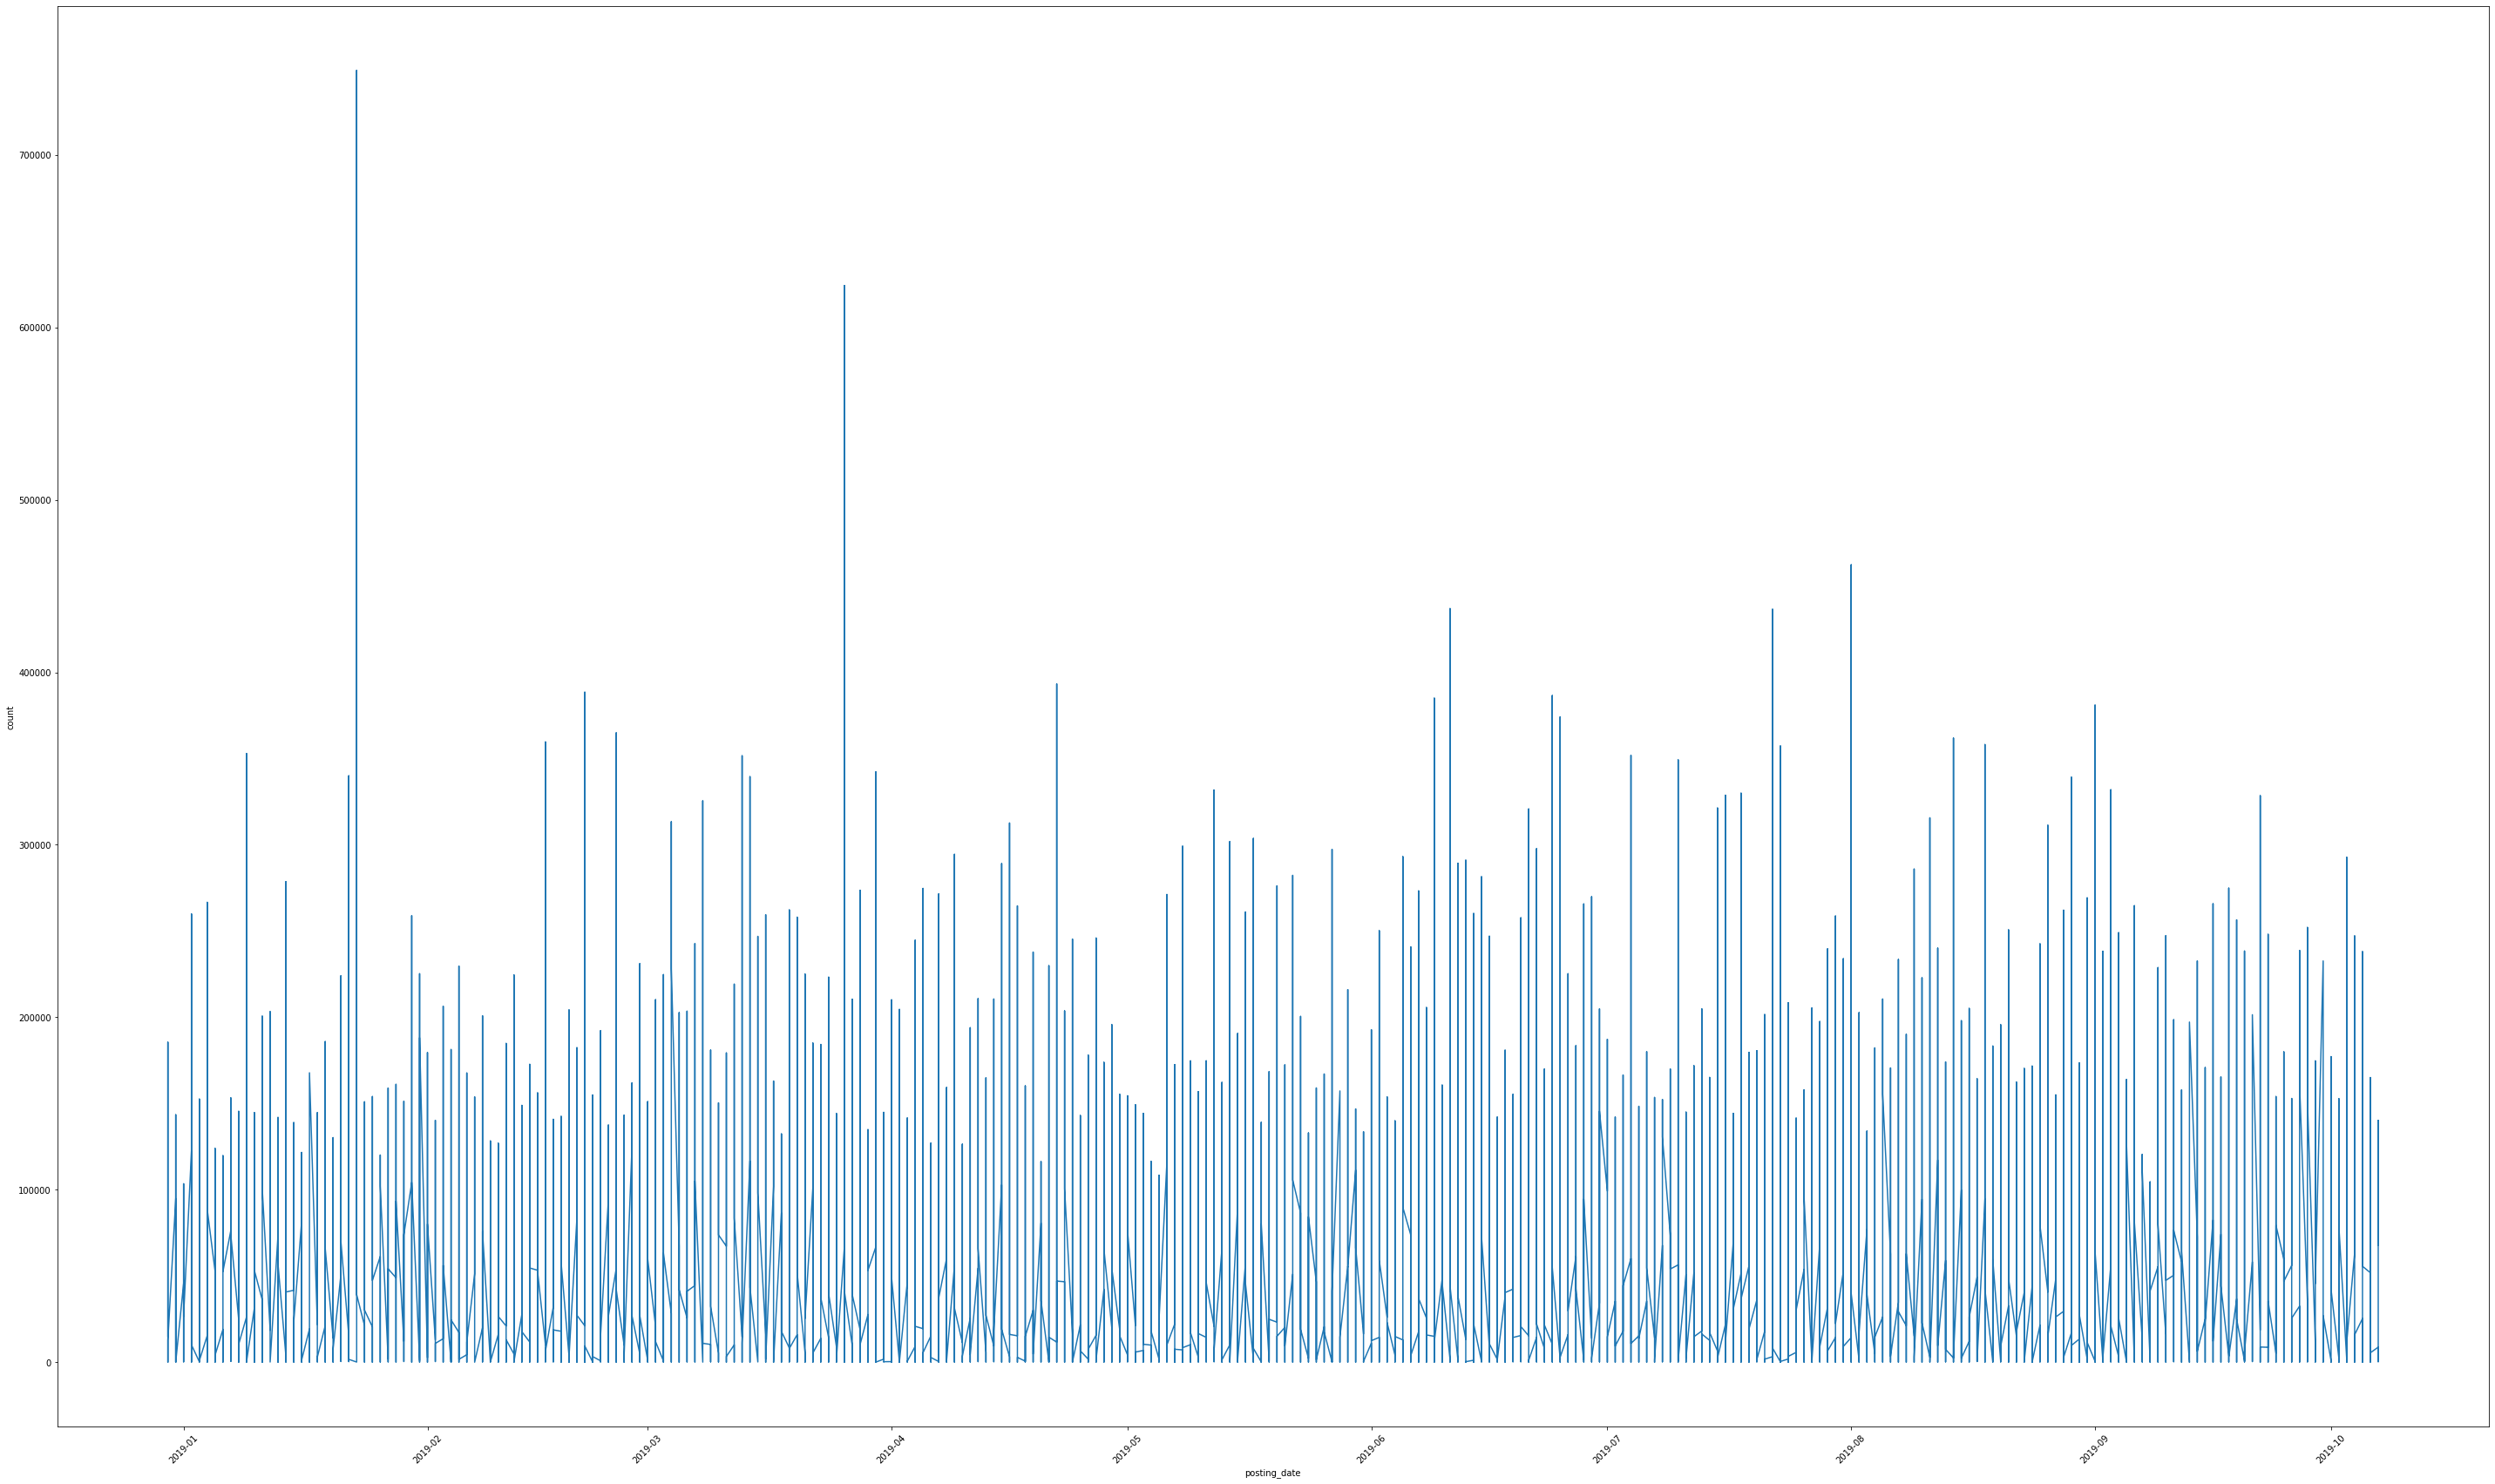

In [41]:
plt.figure(figsize=(50,30))
plt.xlabel("posting_date")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.plot(X_train['document_create_date.1'],X_train['total_open_amount'])

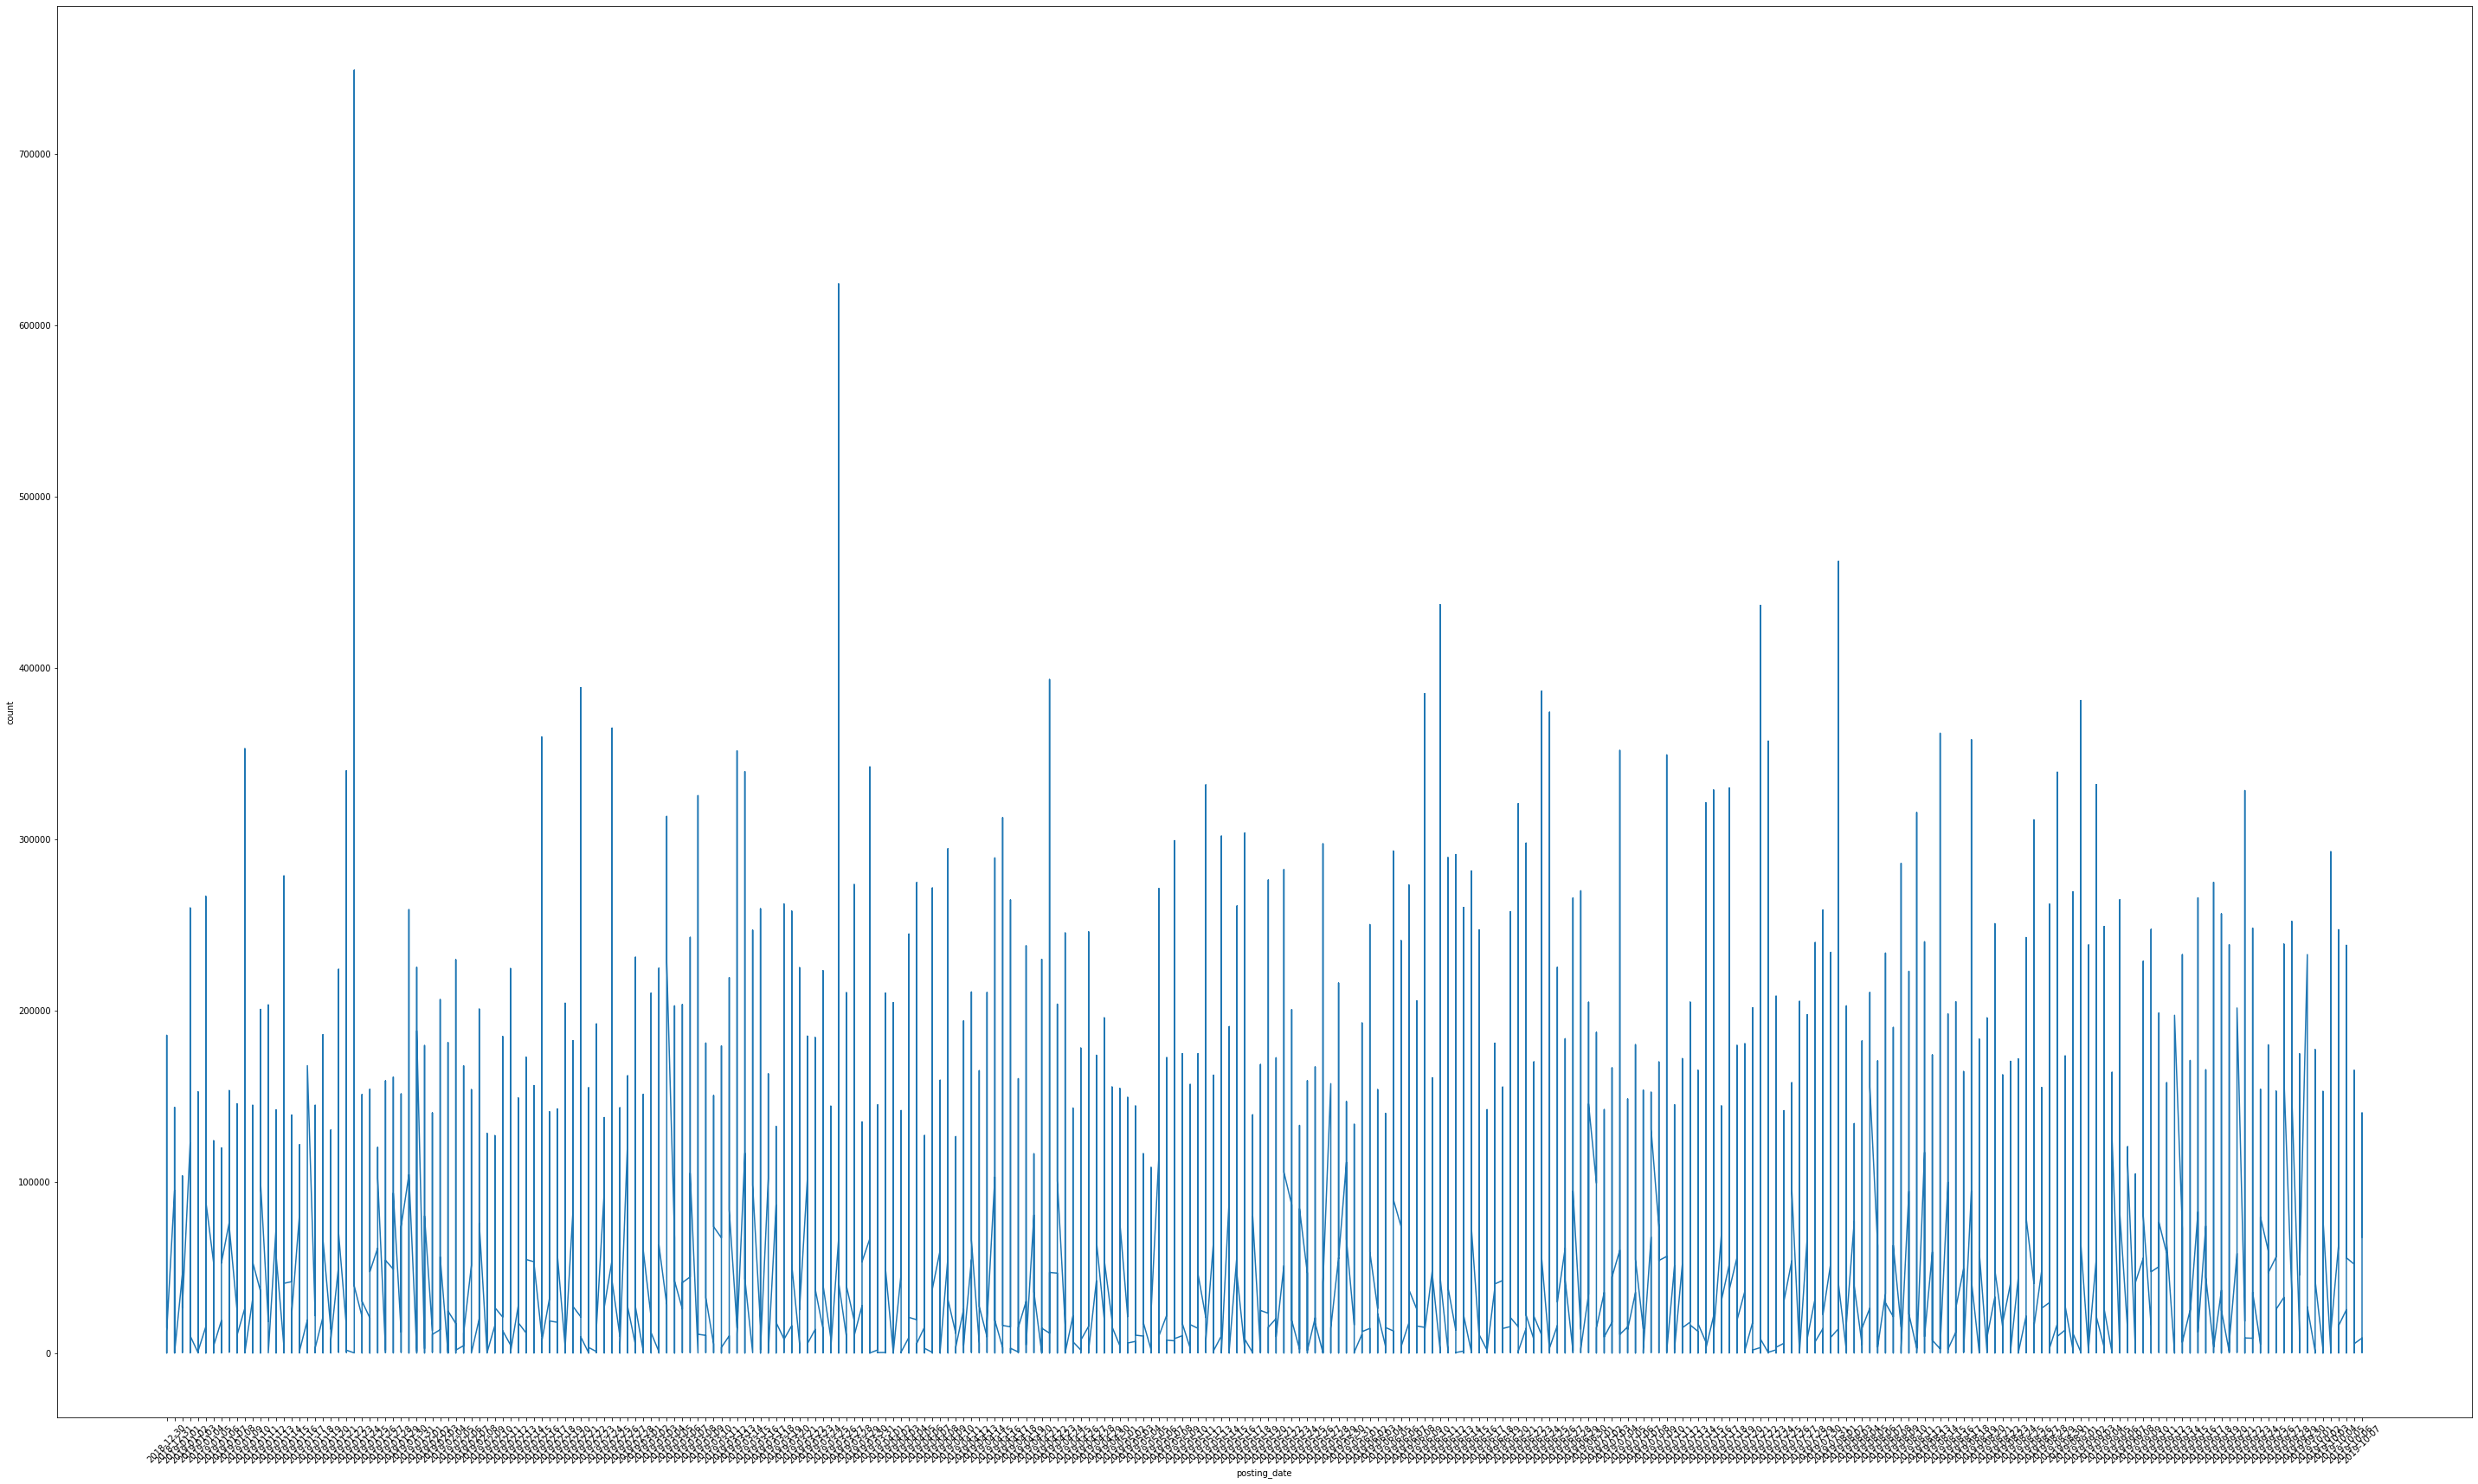

In [42]:
plt.figure(figsize=(50,30))
plt.xlabel("posting_date")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.plot(X_train['posting_date'],X_train['total_open_amount'])

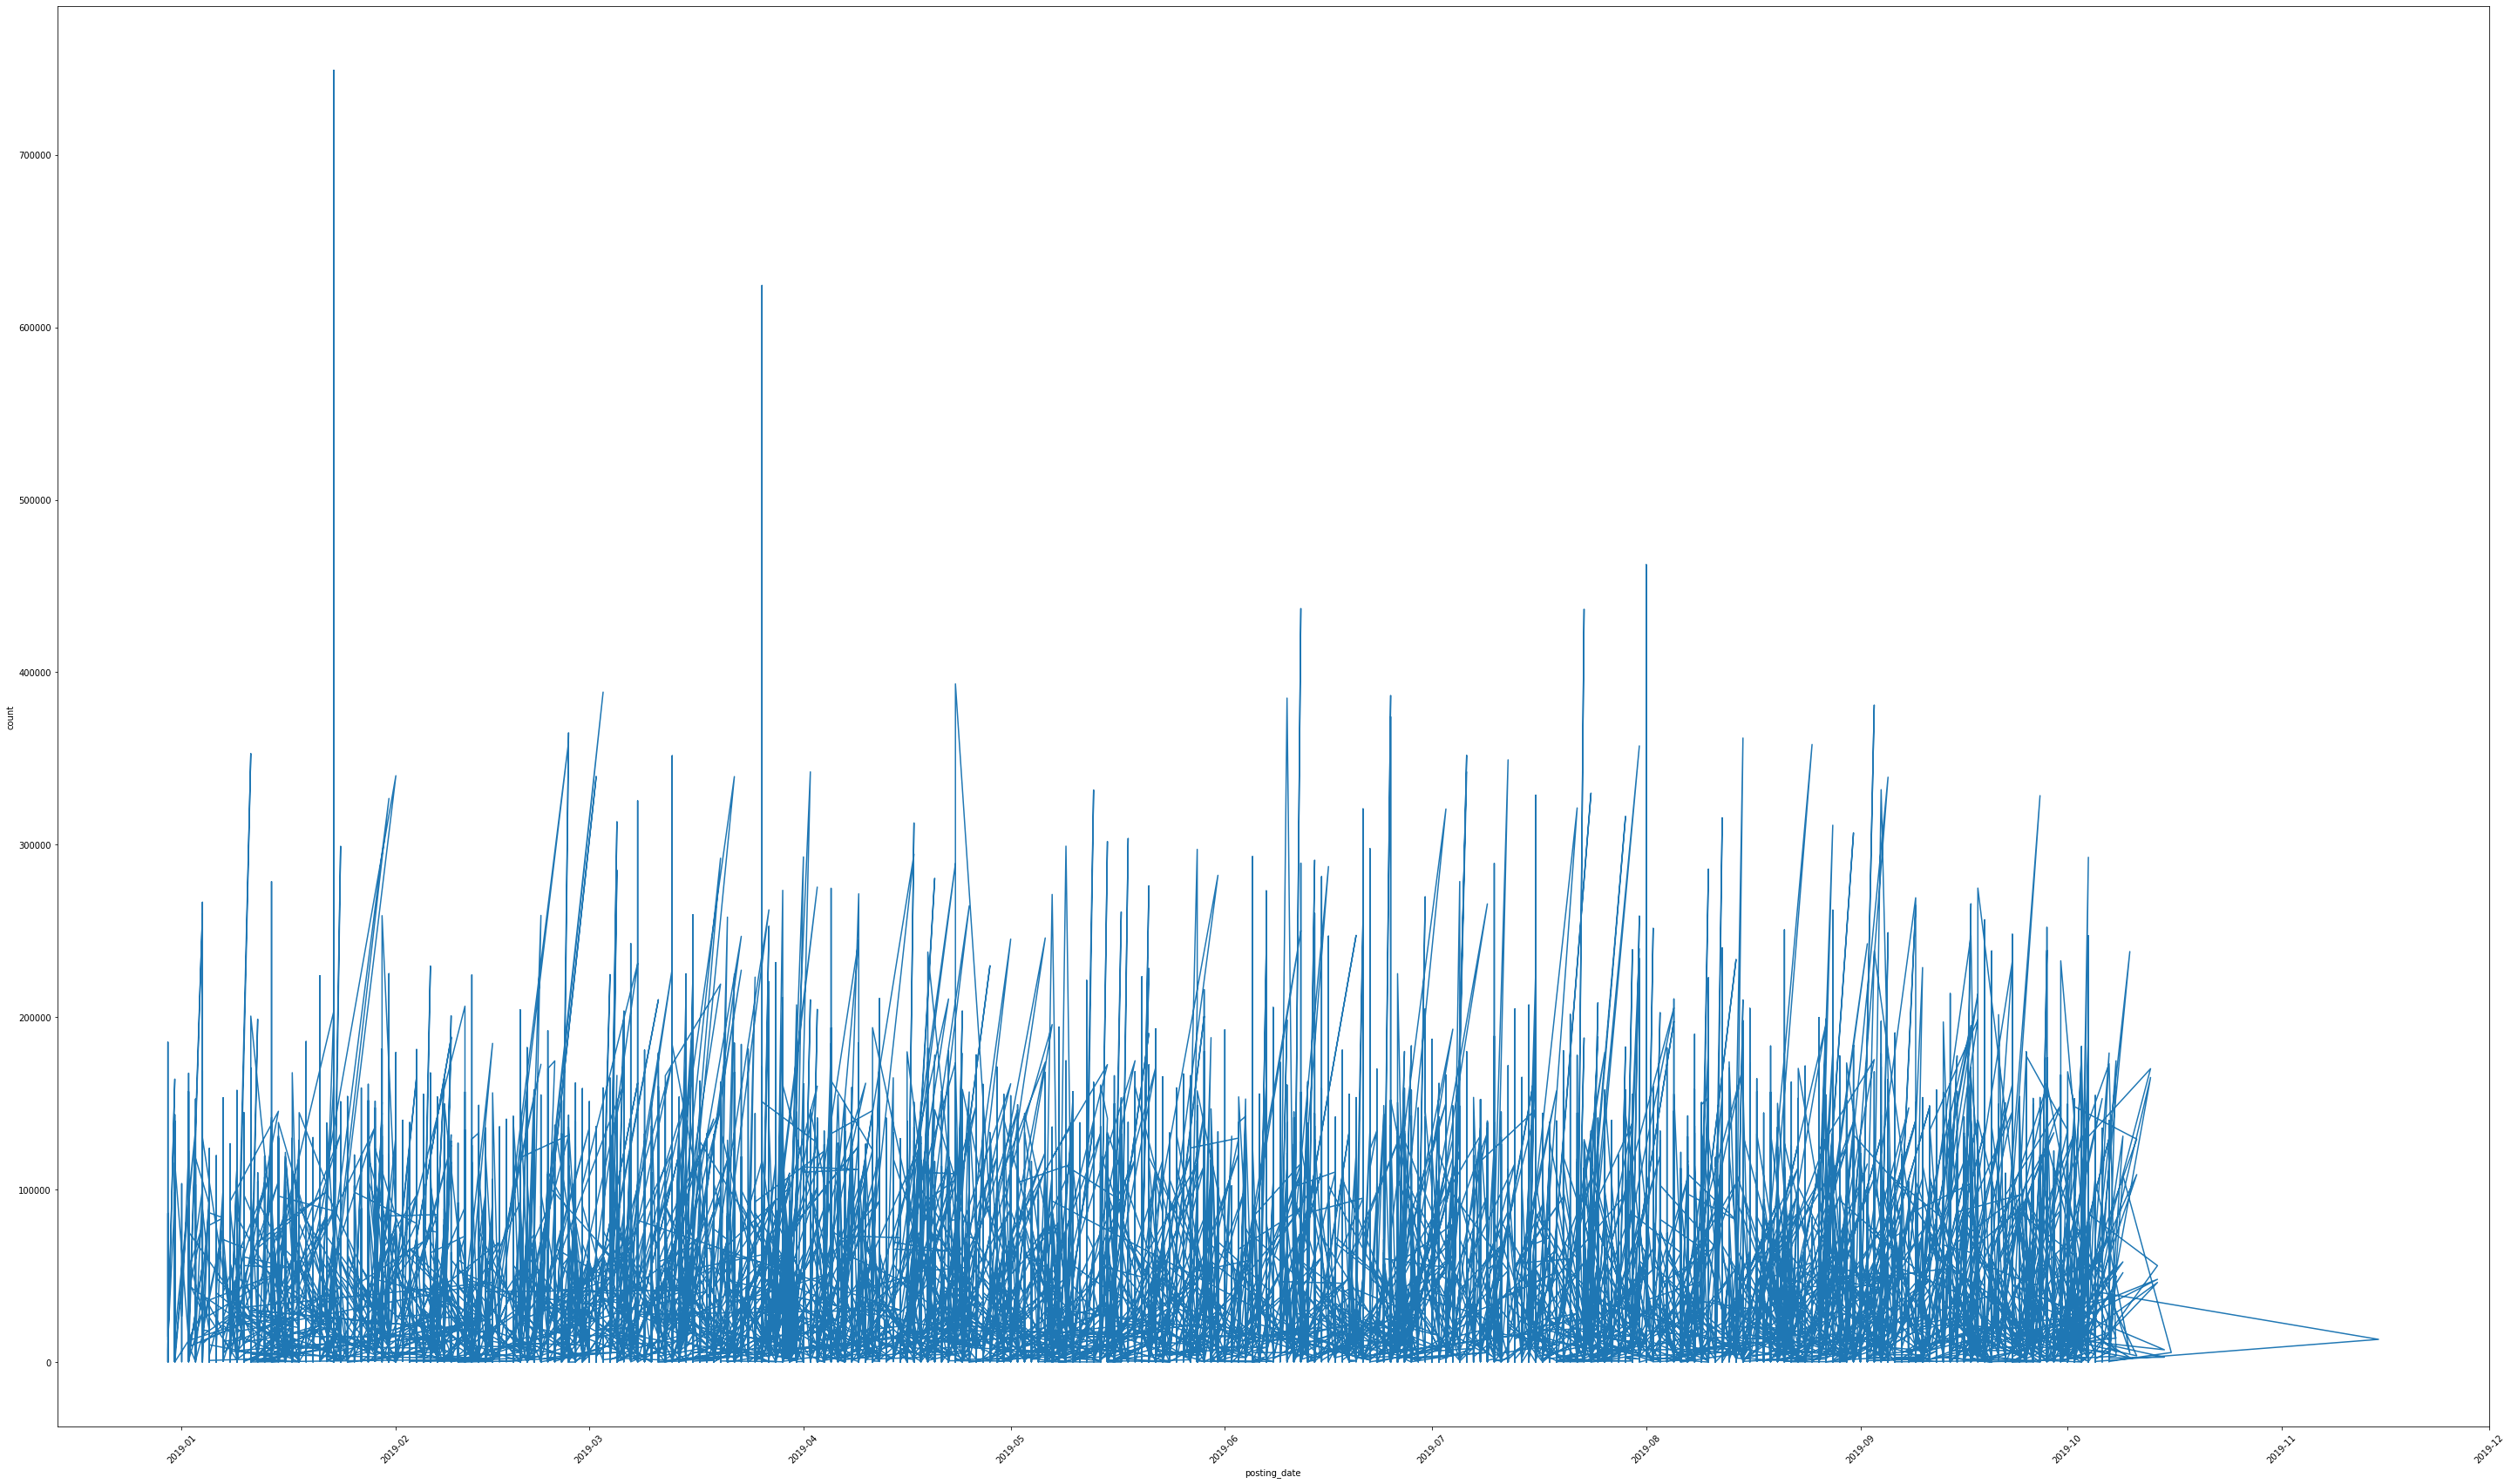

In [43]:
plt.figure(figsize=(50,30))
plt.xlabel("posting_date")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.plot(X_train['baseline_create_date'],X_train['total_open_amount'])

(array([28174.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2630.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

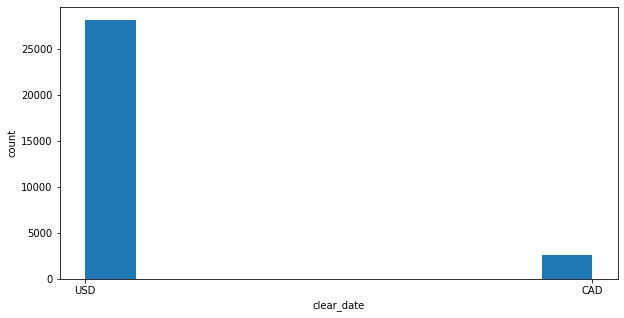

In [44]:
plt.figure(figsize=(10,5))
plt.xlabel("clear_date")
plt.ylabel("count")
plt.hist(X_train['invoice_currency'])

<AxesSubplot:xlabel='business_code', ylabel='count'>

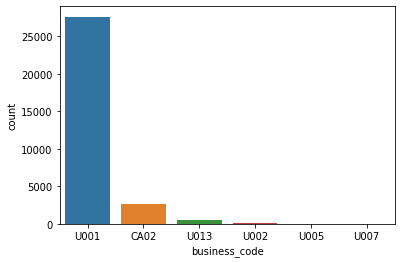

In [45]:
sns.countplot(x ='business_code',data=X_train)
#from here we can say that max entries are of U001

In [46]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
42519,U001,0200315290,KWI,2019-01-10,2019.0,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,RV,15133.15,2018-12-30,NAA8,1.928499e+09,0
27742,U001,0200769623,WAL-MAR,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,39118.11,2018-12-30,NAH4,1.928538e+09,0
14292,U001,0200769623,WAL-MAR llc,2019-01-11,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,10357.32,2018-12-30,NAH4,1.928542e+09,0
19329,U001,0200769623,WAL-MAR,2019-01-14,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,16833.29,2018-12-30,NAH4,1.928543e+09,0
9123,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,756.28,2018-12-30,NAH4,1.928541e+09,0


<AxesSubplot:xlabel='cust_number', ylabel='total_open_amount'>

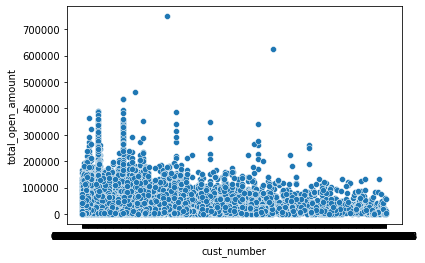

In [47]:
sns.scatterplot(x = 'cust_number' , y = 'total_open_amount',data=X_train )

<AxesSubplot:xlabel='cust_number', ylabel='total_open_amount'>

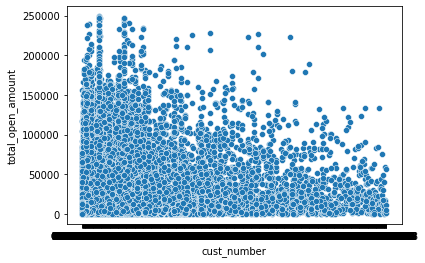

In [48]:
sns.scatterplot(x = 'cust_number' , y = 'total_open_amount',data=X_train[X_train['total_open_amount']<250000] )

In [49]:
X_train.shape

(30804, 16)

<AxesSubplot:xlabel='buisness_year', ylabel='total_open_amount'>

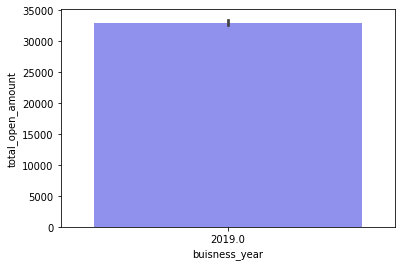

In [50]:
sns.barplot(x='buisness_year',y='total_open_amount',data=X_train,palette='gist_stern')
#max amount in both years with respect to total open amt can be predicted

<AxesSubplot:xlabel='buisness_year', ylabel='total_open_amount'>

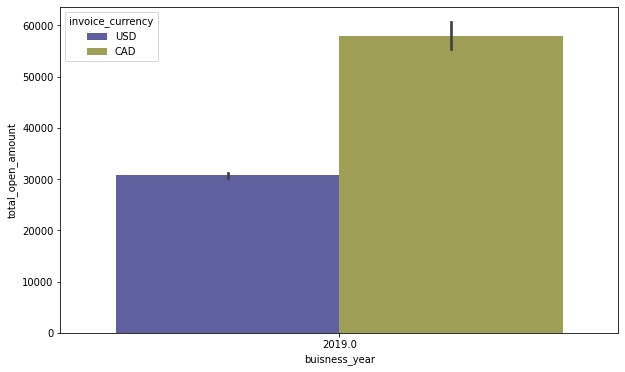

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x='buisness_year',y='total_open_amount',data=X_train
            ,hue='invoice_currency',palette='gist_stern')
#with hue is invoice currency

(array([2.5839e+04, 3.0310e+03, 4.5500e+02, 3.8300e+02, 1.4800e+02,
        6.3000e+02, 2.5000e+01, 1.3000e+01, 2.2000e+02, 6.0000e+01]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ]),
 <BarContainer object of 10 artists>)

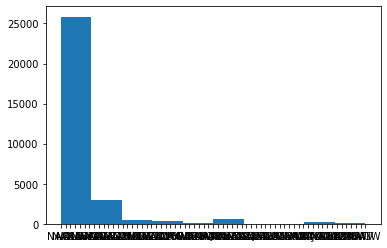

In [52]:
plt.hist(X_train['cust_payment_terms'])

<AxesSubplot:xlabel='buisness_year', ylabel='total_open_amount'>

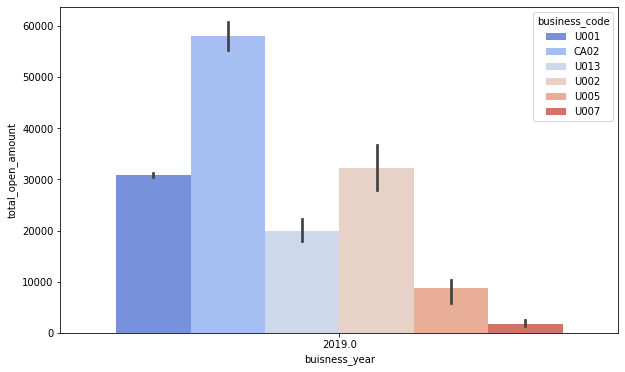

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x='buisness_year',y='total_open_amount',data=X_train
            ,hue='business_code',palette='coolwarm')
#with hue is business code

In [54]:
X_train['invoice_currency'].value_counts()

USD    28174
CAD     2630
Name: invoice_currency, dtype: int64

<AxesSubplot:xlabel='invoice_currency', ylabel='count'>

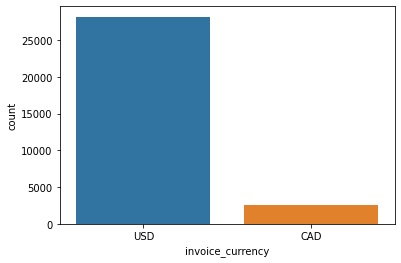

In [55]:
sns.countplot(data=X_train,x='invoice_currency')

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

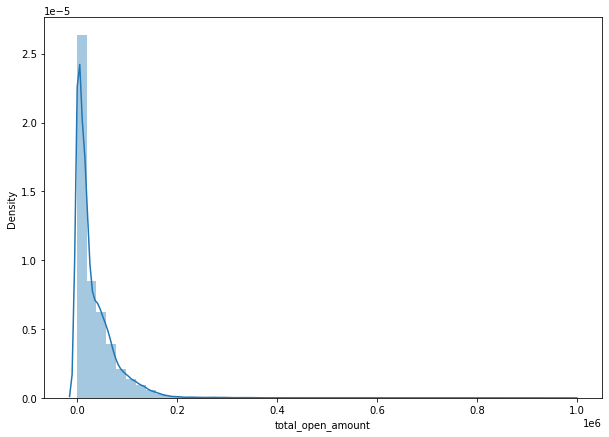

In [56]:
plt.figure(figsize=(10,7))
sns.distplot(df['total_open_amount'],bins=50)

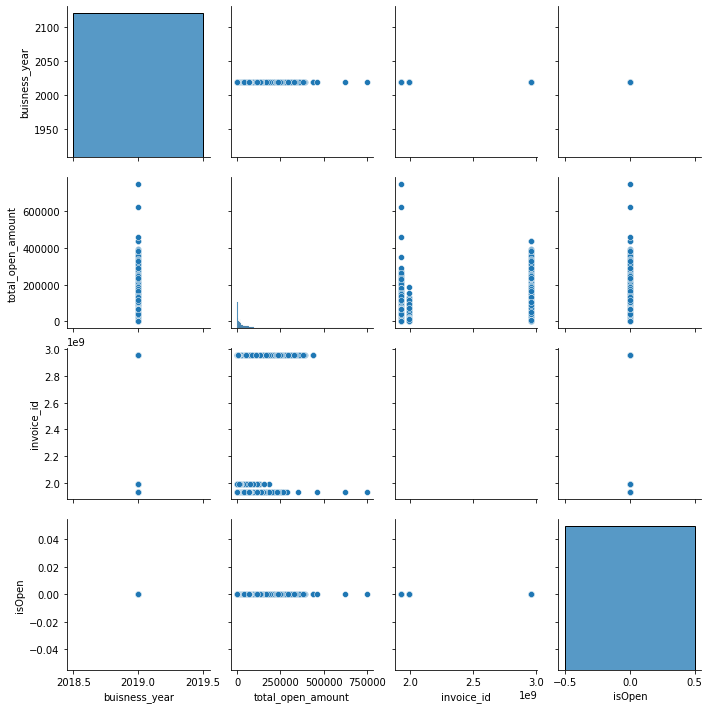

In [57]:
sns.pairplot(X_train,palette='rainbow')

# FEATURE ENGINEERING

In [61]:
from sklearn.preprocessing import StandardScaler
X_train[['total_open_amount']] = StandardScaler().fit_transform(X_train[['total_open_amount']])
X_train.head()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
42519,U001,0200315290,KWI,2019-01-10,2019.0,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,RV,-0.447897,2018-12-30,NAA8,1.928499e+09,0
27742,U001,0200769623,WAL-MAR,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,0.152068,2018-12-30,NAH4,1.928538e+09,0
14292,U001,0200769623,WAL-MAR llc,2019-01-11,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,-0.567361,2018-12-30,NAH4,1.928542e+09,0
19329,U001,0200769623,WAL-MAR,2019-01-14,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,-0.405369,2018-12-30,NAH4,1.928543e+09,0
9123,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,-0.807523,2018-12-30,NAH4,1.928541e+09,0


In [62]:
mapper_business_code=X_train.groupby('business_code')['total_open_amount'].mean().to_dict()
mapper_business_code

{'CA02': 0.6243037036167598,
 'U001': -0.05371091634497577,
 'U002': -0.020668127191608286,
 'U005': -0.6059663761902531,
 'U007': -0.7822178526375468,
 'U013': -0.3273160646443643}

In [63]:
X_train['business_code']=X_train['business_code'].map(mapper_business_code)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
X_val1['business_code']=X_val1['business_code'].map(mapper_business_code)
X_val2['business_code']=X_val2['business_code'].map(mapper_business_code)


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df2['business_code']=df2['business_code'].map(mapper_business_code)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
mapper_invoice_currency=X_train.groupby('invoice_currency')['total_open_amount'].mean().to_dict()
mapper_invoice_currency

{'CAD': 0.6227314481675069, 'USD': -0.05813103246541298}

In [67]:
X_train['invoice_currency']=X_train['invoice_currency'].map(mapper_invoice_currency)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
X_val1['invoice_currency']=X_val1['invoice_currency'].map(mapper_invoice_currency)
X_val2['invoice_currency']=X_val2['invoice_currency'].map(mapper_invoice_currency)


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
df2['invoice_currency']=df2['invoice_currency'].map(mapper_invoice_currency)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
mapper_cust_number=X_train.groupby('cust_number')['total_open_amount'].mean().to_dict()
mapper_cust_number

{'0100000048': 1.9903263328630594,
 '0100000051': 0.11013544875040067,
 '0100000158': 0.06492205015002601,
 '0100000161': -0.8064023602017614,
 '0100000217': -0.5562034073850531,
 '0100000222': 0.1309365852264292,
 '0100000533': -0.8108071158847485,
 '0100000868': 1.2573999013866266,
 '0100001196': -0.2141326106650805,
 '0100001222': -0.5951809134064425,
 '0100003581': -0.2273251971990773,
 '0100003940': -0.03293961929860781,
 '0100004317': -0.7187807659075627,
 '0100004335': 0.5142406488823308,
 '0100004536': 0.1196577964229834,
 '0100004744': -0.1720247390599392,
 '0100004789': -0.7950579068123107,
 '0100005721': 0.2259201352893485,
 '0100006311': -0.2690376756996471,
 '0100006671': 0.12377953173240762,
 '0100007796': -0.7974638379468381,
 '0100007916': -0.6952431263197355,
 '0100008001': -0.3846571968542804,
 '0100008347': -0.4878704105746971,
 '0100008573': -0.03258866965789962,
 '0100009866': -0.6656170232573267,
 '0100009932': -0.5323783923647288,
 '0100010082': -0.74982967834726

In [71]:
X_train['cust_number']=X_train['cust_number'].map(mapper_cust_number)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
X_val1['cust_number']=X_val1['cust_number'].map(mapper_cust_number)
X_val2['cust_number']=X_val2['cust_number'].map(mapper_cust_number)


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
df2['cust_number']=df2['cust_number'].map(mapper_cust_number)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
X_train.nunique()

business_code                 6
cust_number                1254
name_customer              3541
clear_date                  283
buisness_year                 1
posting_date                282
document_create_date        288
document_create_date.1      282
due_in_date                 346
invoice_currency              2
document type                 1
total_open_amount         28142
baseline_create_date        291
cust_payment_terms           65
invoice_id                30804
isOpen                        1
dtype: int64

In [75]:
mapper_name_customer=X_train.groupby('name_customer')['total_open_amount'].mean().to_dict()
mapper_name_customer

{'10167 corporation': -0.6600663657182565,
 '10167 systems': -0.6370532745242748,
 '11078 ': -0.2909188730060987,
 '113712 CA foundation': -0.7820470054496611,
 '113712 CA trust': -0.31878972758037527,
 '17135 co': -0.321154822985148,
 '17135 corporation': -0.37618487730275685,
 '17135 foundation': 0.16346710835020276,
 '236008 llc': -0.41026751550333934,
 '236008 systems': -0.10697773651555874,
 '31650 in': -0.6607467527622526,
 '7 - E corp': -0.4995756942255317,
 '7 - E foundation': -0.09584790521572156,
 '7 - E trust': -0.19606366380812223,
 '9168- co': -0.7035210853075882,
 '99 CE ': -0.43615899409263786,
 '99 CE associates': 0.9228247004186625,
 '99 CE corporation': 0.303021995342646,
 '99 CE foundation': -0.5192124897848311,
 '99 CE llc': -0.4811695987605191,
 '99 CE systems': -0.802372317677563,
 '99 CE trust': 0.5775841823937654,
 '99 CE us': -0.584775035600416,
 'A & W F ': -0.7283600276526315,
 'A & W F associates': -0.7341294971647662,
 'A & W F co': -0.5497125900280201,
 'A

In [76]:
X_train['name_customer']=X_train['name_customer'].map(mapper_name_customer)


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
X_val1['name_customer']=X_val1['name_customer'].map(mapper_name_customer)
X_val2['name_customer']=X_val2['name_customer'].map(mapper_name_customer)


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
df2['name_customer']=df2['name_customer'].map(mapper_name_customer)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
X_train['cust_payment_terms'].head()

42519    NAA8
27742    NAH4
14292    NAH4
19329    NAH4
9123     NAH4
Name: cust_payment_terms, dtype: object

In [80]:
mapper_cust_payment_terms=X_train.groupby('cust_payment_terms')['total_open_amount'].mean().to_dict()
mapper_cust_payment_terms

{'B030': -0.6456181467251655,
 'B112': 0.4694476680116101,
 'BR56': -0.3090548564822603,
 'C106': 0.07961656834343525,
 'C129': -0.22102261191947337,
 'CA10': 0.6334315579015326,
 'CA30': 0.6972882949603418,
 'CA60': -0.6812023891261553,
 'CAB1': -0.6892230350726143,
 'CAX2': -0.825956108518926,
 'NA10': -0.03867659528073215,
 'NA24': -0.8023397991791368,
 'NA25': -0.41350610780430114,
 'NA31': -0.6877506141400254,
 'NA32': -0.23421146726700823,
 'NA38': 0.6174166010215626,
 'NA3B': -0.22258430982851088,
 'NA3F': -0.328366811950462,
 'NA84': -0.13964859084156464,
 'NA8Q': 0.1314125405014724,
 'NA9X': -0.43742491422214347,
 'NAA8': 0.0840546750386879,
 'NAAW': -0.3612505145751395,
 'NAAX': -0.2342405647889436,
 'NAB1': -0.4324637848983893,
 'NABG': 0.22273114620560158,
 'NAC6': 0.4673082845737604,
 'NACB': -0.3272221331221247,
 'NAD1': -0.20314743380747763,
 'NAD4': 0.4000569060209354,
 'NAD5': 0.23640366033584798,
 'NAD8': 0.651253339724726,
 'NAG2': -0.20434311040469483,
 'NAGD': -0.4

In [81]:
X_train['clear_date_year'] = pd.DatetimeIndex(X_train['clear_date']).year
X_train['clear_date_month'] = pd.DatetimeIndex(X_train['clear_date']).month
X_train['clear_date_day'] = pd.DatetimeIndex(X_train['clear_date']).day
X_train.head()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,clear_date_year,clear_date_month,clear_date_day
42519,-0.053711,0.144232,-0.447897,2019-01-10,2019.0,2018-12-30,2018-12-31,2018-12-30,2019-01-14,-0.058131,RV,-0.447897,2018-12-30,NAA8,1.928499e+09,0,2019,1,10
27742,-0.053711,-0.271139,-0.257224,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,-0.058131,RV,0.152068,2018-12-30,NAH4,1.928538e+09,0,2019,1,9
14292,-0.053711,-0.271139,-0.267682,2019-01-11,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,-0.058131,RV,-0.567361,2018-12-30,NAH4,1.928542e+09,0,2019,1,11
19329,-0.053711,-0.271139,-0.257224,2019-01-14,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,-0.058131,RV,-0.405369,2018-12-30,NAH4,1.928543e+09,0,2019,1,14
9123,-0.053711,-0.271139,-0.284912,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,-0.058131,RV,-0.807523,2018-12-30,NAH4,1.928541e+09,0,2019,1,9


In [82]:
X_train['document_create_date.1_year'] = pd.DatetimeIndex(X_train['document_create_date.1']).year
X_train['document_create_date.1_month'] = pd.DatetimeIndex(X_train['document_create_date.1']).month
X_train['document_create_date.1_day'] = pd.DatetimeIndex(X_train['document_create_date.1']).day
X_train['document_create_date_year'] = pd.DatetimeIndex(X_train['document_create_date']).year
X_train['document_create_date_month'] = pd.DatetimeIndex(X_train['document_create_date']).month


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [83]:
X_train['due_in_date_year'] = pd.DatetimeIndex(X_train['due_in_date']).year
X_train['due_in_date_month'] = pd.DatetimeIndex(X_train['due_in_date']).month
X_train['due_in_date_day'] = pd.DatetimeIndex(X_train['due_in_date']).day


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [84]:
X_train['baseline_create_date_year'] = pd.DatetimeIndex(X_train['baseline_create_date']).year
X_train['baseline_create_date_month'] = pd.DatetimeIndex(X_train['baseline_create_date']).month
X_train['baseline_create_date_day'] = pd.DatetimeIndex(X_train['baseline_create_date']).day




c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [85]:
X_train['posting_date_year'] = pd.DatetimeIndex(X_train['posting_date']).year
X_train['posting_date_month'] = pd.DatetimeIndex(X_train['posting_date']).month
X_train['posting_date_day'] = pd.DatetimeIndex(X_train['posting_date']).day


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [86]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,...,document_create_date_month,due_in_date_year,due_in_date_month,due_in_date_day,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,posting_date_year,posting_date_month,posting_date_day
42519,-0.053711,0.144232,-0.447897,2019-01-10,2019.0,2018-12-30,2018-12-31,2018-12-30,2019-01-14,-0.058131,...,12,2019,1,14,2018,12,30,2018,12,30
27742,-0.053711,-0.271139,-0.257224,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,-0.058131,...,12,2019,1,14,2018,12,30,2018,12,30
14292,-0.053711,-0.271139,-0.267682,2019-01-11,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,-0.058131,...,12,2019,1,14,2018,12,30,2018,12,30
19329,-0.053711,-0.271139,-0.257224,2019-01-14,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,-0.058131,...,12,2019,1,14,2018,12,30,2018,12,30
9123,-0.053711,-0.271139,-0.284912,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,-0.058131,...,12,2019,1,14,2018,12,30,2018,12,30


# Dropping unwanted columns

In [87]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'isOpen', 'clear_date_year',
       'clear_date_month', 'clear_date_day', 'document_create_date.1_year',
       'document_create_date.1_month', 'document_create_date.1_day',
       'document_create_date_year', 'document_create_date_month',
       'due_in_date_year', 'due_in_date_month', 'due_in_date_day',
       'baseline_create_date_year', 'baseline_create_date_month',
       'baseline_create_date_day', 'posting_date_year', 'posting_date_month',
       'posting_date_day'],
      dtype='object')

In [88]:
X_train.shape

(30804, 33)

In [89]:
X_train.nunique()

business_code                       6
cust_number                      1254
name_customer                    3457
clear_date                        283
buisness_year                       1
posting_date                      282
document_create_date              288
document_create_date.1            282
due_in_date                       346
invoice_currency                    2
document type                       1
total_open_amount               28142
baseline_create_date              291
cust_payment_terms                 65
invoice_id                      30804
isOpen                              1
clear_date_year                     1
clear_date_month                   12
clear_date_day                     31
document_create_date.1_year         2
document_create_date.1_month       11
document_create_date.1_day         31
document_create_date_year           2
document_create_date_month         11
due_in_date_year                    3
due_in_date_month                  12
due_in_date_

In [90]:
X_train.drop(['clear_date','posting_date','document_create_date',
              'document_create_date.1','baseline_create_date'],axis=1,inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
X_train.nunique()

business_code                       6
cust_number                      1254
name_customer                    3457
buisness_year                       1
due_in_date                       346
invoice_currency                    2
document type                       1
total_open_amount               28142
cust_payment_terms                 65
invoice_id                      30804
isOpen                              1
clear_date_year                     1
clear_date_month                   12
clear_date_day                     31
document_create_date.1_year         2
document_create_date.1_month       11
document_create_date.1_day         31
document_create_date_year           2
document_create_date_month         11
due_in_date_year                    3
due_in_date_month                  12
due_in_date_day                    31
baseline_create_date_year           2
baseline_create_date_month         12
baseline_create_date_day           31
posting_date_year                   2
posting_date

In [92]:
X_train.shape

(30804, 28)

In [93]:
X_train.drop(['buisness_year','document type','clear_date_year',
              'clear_date_month'],axis=1,inplace=True)

In [94]:
X_train.nunique()

business_code                       6
cust_number                      1254
name_customer                    3457
due_in_date                       346
invoice_currency                    2
total_open_amount               28142
cust_payment_terms                 65
invoice_id                      30804
isOpen                              1
clear_date_day                     31
document_create_date.1_year         2
document_create_date.1_month       11
document_create_date.1_day         31
document_create_date_year           2
document_create_date_month         11
due_in_date_year                    3
due_in_date_month                  12
due_in_date_day                    31
baseline_create_date_year           2
baseline_create_date_month         12
baseline_create_date_day           31
posting_date_year                   2
posting_date_month                 11
posting_date_day                   31
dtype: int64

In [95]:
X_train.shape

(30804, 24)

In [96]:
X_train.drop(['due_in_date','invoice_id','isOpen',
              'clear_date_day','document_create_date_year','document_create_date_year',
              'document_create_date_month'],axis=1,inplace=True)

In [97]:
X_train.shape

(30804, 18)

In [98]:
X_train.nunique()

business_code                       6
cust_number                      1254
name_customer                    3457
invoice_currency                    2
total_open_amount               28142
cust_payment_terms                 65
document_create_date.1_year         2
document_create_date.1_month       11
document_create_date.1_day         31
due_in_date_year                    3
due_in_date_month                  12
due_in_date_day                    31
baseline_create_date_year           2
baseline_create_date_month         12
baseline_create_date_day           31
posting_date_year                   2
posting_date_month                 11
posting_date_day                   31
dtype: int64

In [99]:
X_train['cust_payment_terms']=X_train['cust_payment_terms'].map(mapper_cust_payment_terms)
X_val1['cust_payment_terms']=X_val1['cust_payment_terms'].map(mapper_cust_payment_terms)
X_val2['cust_payment_terms']=X_val2['cust_payment_terms'].map(mapper_cust_payment_terms)
df2['cust_payment_terms']=df2['cust_payment_terms'].map(mapper_cust_payment_terms)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [100]:
X_train.head()

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_year,document_create_date.1_month,document_create_date.1_day,due_in_date_year,due_in_date_month,due_in_date_day,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,posting_date_year,posting_date_month,posting_date_day
42519,-0.053711,0.144232,-0.447897,-0.058131,-0.447897,0.084055,2018,12,30,2019,1,14,2018,12,30,2018,12,30
27742,-0.053711,-0.271139,-0.257224,-0.058131,0.152068,-0.246463,2018,12,30,2019,1,14,2018,12,30,2018,12,30
14292,-0.053711,-0.271139,-0.267682,-0.058131,-0.567361,-0.246463,2018,12,30,2019,1,14,2018,12,30,2018,12,30
19329,-0.053711,-0.271139,-0.257224,-0.058131,-0.405369,-0.246463,2018,12,30,2019,1,14,2018,12,30,2018,12,30
9123,-0.053711,-0.271139,-0.284912,-0.058131,-0.807523,-0.246463,2018,12,30,2019,1,14,2018,12,30,2018,12,30


Filter methods

In [101]:
from sklearn.feature_selection import VarianceThreshold
# Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(X_train)
#the number of non-constant features.
len(X_train.columns[constant_filter.get_support()])

18

In [102]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


# Removing duplicated features (Filter method)

In [103]:
# transpose the feature matrice
X_train_T = X_train.T
# print the number of duplicated features
print(X_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = X_train_T[X_train_T.duplicated()].index.values

3


In [104]:
duplicated_columns

array(['posting_date_year', 'posting_date_month', 'posting_date_day'],
      dtype=object)

In [105]:
X_train.drop(['posting_date_year','posting_date_day'],axis=1,inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [106]:
X_train.nunique()

business_code                       6
cust_number                      1254
name_customer                    3457
invoice_currency                    2
total_open_amount               28142
cust_payment_terms                 65
document_create_date.1_year         2
document_create_date.1_month       11
document_create_date.1_day         31
due_in_date_year                    3
due_in_date_month                  12
due_in_date_day                    31
baseline_create_date_year           2
baseline_create_date_month         12
baseline_create_date_day           31
posting_date_month                 11
dtype: int64

In [107]:
X_train.shape

(30804, 16)

In [108]:
# transpose the feature matrice
X_train_T = X_train.T
# print the number of duplicated features
print(X_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = X_train_T[X_train_T.duplicated()].index.values
duplicated_columns

1


array(['posting_date_month'], dtype=object)

<AxesSubplot:>

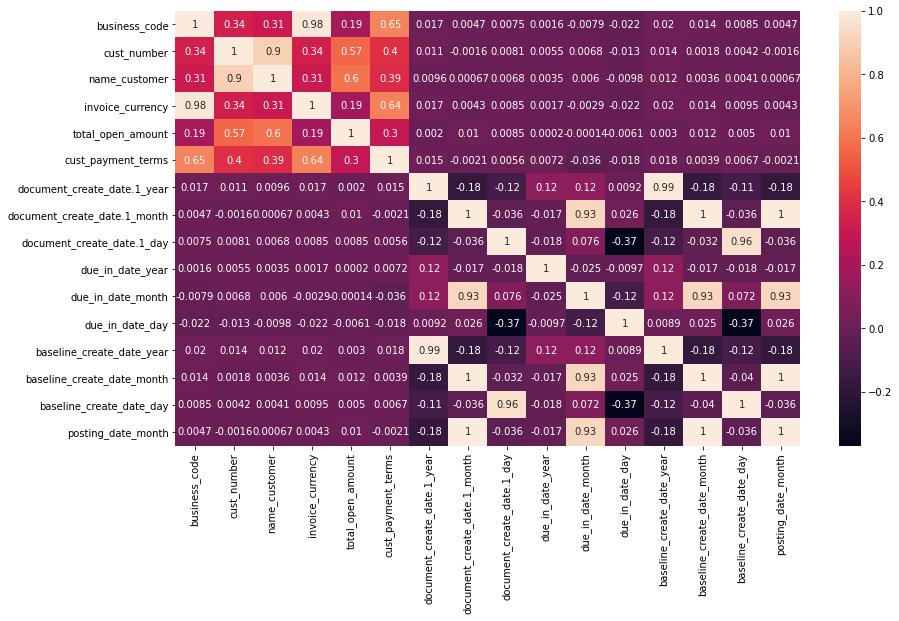

In [109]:
corr=X_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [110]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = X_train.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [111]:
handling_correlation(X_train.copy(),0.85)

['name_customer',
 'baseline_create_date_year',
 'posting_date_month',
 'baseline_create_date_day',
 'invoice_currency',
 'due_in_date_month',
 'baseline_create_date_month']

In [112]:
X_train.drop(['due_in_date_month',
 'baseline_create_date_day',
 'baseline_create_date_month',
 'baseline_create_date_year'],axis=1,inplace=True)

In [113]:
X_train.shape

(30804, 12)

In [114]:
import mlxtend
def FFS(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    # Sequential Forward Selection(sfs)
    sfs = SFS(LinearRegression(),
              k_features=8,
              forward=True,
              scoring = 'r2',
              cv = 5)
  
    sfs.fit(X, y)#doing the FFS
    
    return sfs.k_feature_names_

In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30804 entries, 42519 to 28665
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_code                 30804 non-null  float64
 1   cust_number                   30804 non-null  float64
 2   name_customer                 30804 non-null  float64
 3   invoice_currency              30804 non-null  float64
 4   total_open_amount             30804 non-null  float64
 5   cust_payment_terms            30804 non-null  float64
 6   document_create_date.1_year   30804 non-null  int64  
 7   document_create_date.1_month  30804 non-null  int64  
 8   document_create_date.1_day    30804 non-null  int64  
 9   due_in_date_year              30804 non-null  int64  
 10  due_in_date_day               30804 non-null  int64  
 11  posting_date_month            30804 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 4.1 MB


In [116]:
FFS(X_train,y_train)#features selected by FFS

('business_code',
 'cust_number',
 'invoice_currency',
 'cust_payment_terms',
 'document_create_date.1_day',
 'due_in_date_year',
 'due_in_date_day',
 'posting_date_month')

In [117]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

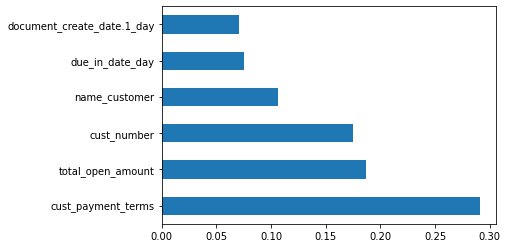

In [118]:
feature_importance=tree_based_feature_importance(X_train,y_train)#features importance to data frame


In [119]:
display(feature_importance)

,Features,Importances
5,cust_payment_terms,0.291384
4,total_open_amount,0.186968
1,cust_number,0.175382
2,name_customer,0.106269
10,due_in_date_day,0.075274
8,document_create_date.1_day,0.070445
7,document_create_date.1_month,0.032684
11,posting_date_month,0.032307
0,business_code,0.027631
6,document_create_date.1_year,0.001124


In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30804 entries, 42519 to 28665
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_code                 30804 non-null  float64
 1   cust_number                   30804 non-null  float64
 2   name_customer                 30804 non-null  float64
 3   invoice_currency              30804 non-null  float64
 4   total_open_amount             30804 non-null  float64
 5   cust_payment_terms            30804 non-null  float64
 6   document_create_date.1_year   30804 non-null  int64  
 7   document_create_date.1_month  30804 non-null  int64  
 8   document_create_date.1_day    30804 non-null  int64  
 9   due_in_date_year              30804 non-null  int64  
 10  due_in_date_day               30804 non-null  int64  
 11  posting_date_month            30804 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 4.1 MB


In [121]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'invoice_currency',
       'total_open_amount', 'cust_payment_terms',
       'document_create_date.1_year', 'document_create_date.1_month',
       'document_create_date.1_day', 'due_in_date_year', 'due_in_date_day',
       'posting_date_month'],
      dtype='object')

In [122]:
X_train_new=X_train[['business_code', 'cust_number', 'name_customer', 'invoice_currency',
       'total_open_amount', 'cust_payment_terms',
       'document_create_date.1_day', 'due_in_date_year', 'due_in_date_day',
       'posting_date_month']]

In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30804 entries, 42519 to 28665
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_code                 30804 non-null  float64
 1   cust_number                   30804 non-null  float64
 2   name_customer                 30804 non-null  float64
 3   invoice_currency              30804 non-null  float64
 4   total_open_amount             30804 non-null  float64
 5   cust_payment_terms            30804 non-null  float64
 6   document_create_date.1_year   30804 non-null  int64  
 7   document_create_date.1_month  30804 non-null  int64  
 8   document_create_date.1_day    30804 non-null  int64  
 9   due_in_date_year              30804 non-null  int64  
 10  due_in_date_day               30804 non-null  int64  
 11  posting_date_month            30804 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 4.1 MB


In [124]:
X_train_new.head()

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_day,due_in_date_year,due_in_date_day,posting_date_month
42519,-0.053711,0.144232,-0.447897,-0.058131,-0.447897,0.084055,30,2019,14,12
27742,-0.053711,-0.271139,-0.257224,-0.058131,0.152068,-0.246463,30,2019,14,12
14292,-0.053711,-0.271139,-0.267682,-0.058131,-0.567361,-0.246463,30,2019,14,12
19329,-0.053711,-0.271139,-0.257224,-0.058131,-0.405369,-0.246463,30,2019,14,12
9123,-0.053711,-0.271139,-0.284912,-0.058131,-0.807523,-0.246463,30,2019,14,12


# Data preprocessing,and removal of extra features in X_val1,X_val2,df2 for fitting our dataset

In [125]:
X_val1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
19200,-0.053711,0.142134,0.424552,2019-10-30,2019.0,1.929965e+09,2019-10-07,2019-10-04,2019-10-07,2019-10-22,-0.058131,RV,1.0,NaN,57057.23,2019-10-07,0.084055,1.929965e+09,0
15699,-0.053711,-0.712836,-0.772037,2019-10-22,2019.0,1.929951e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-22,-0.058131,RV,1.0,NaN,294.63,2019-10-07,0.084055,1.929951e+09,0
24267,-0.053711,-0.229310,-0.322799,2019-10-21,2019.0,1.929965e+09,2019-10-07,2019-10-04,2019-10-07,2019-10-22,-0.058131,RV,1.0,NaN,8615.06,2019-10-07,-0.234241,1.929965e+09,0
6506,-0.053711,-0.712836,-0.654077,2019-10-22,2019.0,1.929976e+09,2019-10-07,2019-10-06,2019-10-07,2019-10-22,-0.058131,RV,1.0,NaN,262.85,2019-10-07,0.084055,1.929976e+09,0
45711,-0.053711,1.423262,NaN,2019-10-11,2019.0,1.929972e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-22,-0.058131,RV,1.0,NaN,43785.70,2019-10-07,0.084055,1.929972e+09,0


In [126]:
X_val1['document_create_date.1_month'] = pd.DatetimeIndex(X_val1['document_create_date.1']).month
X_val1['document_create_date.1_day'] = pd.DatetimeIndex(X_val1['document_create_date.1']).day
X_val1['posting_date_month'] = pd.DatetimeIndex(X_val1['posting_date']).month
X_val1['due_in_date_year'] = pd.DatetimeIndex(X_val1['due_in_date']).year
X_val1['due_in_date_day'] = pd.DatetimeIndex(X_val1['due_in_date']).day

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [127]:
X_val1.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',
       'document_create_date.1_month', 'document_create_date.1_day',
       'posting_date_month', 'due_in_date_year', 'due_in_date_day'],
      dtype='object')

In [128]:
X_val1.drop(['clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date',
       'document type', 'posting_id', 'area_business',
       'baseline_create_date', 'invoice_id', 'isOpen',
       'document_create_date.1_month'],axis=1,inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [129]:
X_val1.nunique()

business_code                    5
cust_number                    472
name_customer                 1258
invoice_currency                 2
total_open_amount             6209
cust_payment_terms              34
document_create_date.1_day      31
posting_date_month               3
due_in_date_year                 2
due_in_date_day                 31
dtype: int64

In [130]:
X_val1.shape

(6601, 10)

In [131]:
X_val1.isnull().sum()

business_code                   0
cust_number                    62
name_customer                 310
invoice_currency                0
total_open_amount               0
cust_payment_terms              3
document_create_date.1_day      0
posting_date_month              0
due_in_date_year                0
due_in_date_day                 0
dtype: int64

In [132]:

X_val1['name_customer'].fillna(float(X_val1['name_customer'].mode().values[0]),inplace=True)
X_val1['cust_number'].fillna(float(X_val1['cust_number'].mode().values[0]),inplace=True)
X_val1['cust_payment_terms'].fillna(float(X_val1['cust_payment_terms'].mode().values[0]),inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [133]:
X_val1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6601 entries, 19200 to 43353
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_code               6601 non-null   float64
 1   cust_number                 6601 non-null   float64
 2   name_customer               6601 non-null   float64
 3   invoice_currency            6601 non-null   float64
 4   total_open_amount           6601 non-null   float64
 5   cust_payment_terms          6601 non-null   float64
 6   document_create_date.1_day  6601 non-null   int64  
 7   posting_date_month          6601 non-null   int64  
 8   due_in_date_year            6601 non-null   int64  
 9   due_in_date_day             6601 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 567.3 KB


In [134]:
X_val1.head()

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_day,posting_date_month,due_in_date_year,due_in_date_day
19200,-0.053711,0.142134,0.424552,-0.058131,57057.23,0.084055,7,10,2019,22
15699,-0.053711,-0.712836,-0.772037,-0.058131,294.63,0.084055,7,10,2019,22
24267,-0.053711,-0.229310,-0.322799,-0.058131,8615.06,-0.234241,7,10,2019,22
6506,-0.053711,-0.712836,-0.654077,-0.058131,262.85,0.084055,7,10,2019,22
45711,-0.053711,1.423262,-0.284912,-0.058131,43785.70,0.084055,7,10,2019,22


In [135]:
X_val1.shape

(6601, 10)

In [136]:
X_val1.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
invoice_currency              0
total_open_amount             0
cust_payment_terms            0
document_create_date.1_day    0
posting_date_month            0
due_in_date_year              0
due_in_date_day               0
dtype: int64

In [137]:
X_val1.head()

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_day,posting_date_month,due_in_date_year,due_in_date_day
19200,-0.053711,0.142134,0.424552,-0.058131,57057.23,0.084055,7,10,2019,22
15699,-0.053711,-0.712836,-0.772037,-0.058131,294.63,0.084055,7,10,2019,22
24267,-0.053711,-0.229310,-0.322799,-0.058131,8615.06,-0.234241,7,10,2019,22
6506,-0.053711,-0.712836,-0.654077,-0.058131,262.85,0.084055,7,10,2019,22
45711,-0.053711,1.423262,-0.284912,-0.058131,43785.70,0.084055,7,10,2019,22


In [138]:
from sklearn.preprocessing import StandardScaler
X_val1[['total_open_amount']] = StandardScaler().fit_transform(X_val1[['total_open_amount']])
X_val1.head()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_day,posting_date_month,due_in_date_year,due_in_date_day
19200,-0.053711,0.142134,0.424552,-0.058131,0.448515,0.084055,7,10,2019,22
15699,-0.053711,-0.712836,-0.772037,-0.058131,-0.781041,0.084055,7,10,2019,22
24267,-0.053711,-0.229310,-0.322799,-0.058131,-0.600809,-0.234241,7,10,2019,22
6506,-0.053711,-0.712836,-0.654077,-0.058131,-0.781729,0.084055,7,10,2019,22
45711,-0.053711,1.423262,-0.284912,-0.058131,0.161036,0.084055,7,10,2019,22


In [139]:
X_val2.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
93,-0.053711,-0.271139,-0.267682,2019-12-19,2019.0,1.930250e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-24,-0.058131,RV,1.0,NaN,52130.80,2019-12-09,-0.246463,1.930250e+09,0
39720,-0.053711,NaN,NaN,2019-12-24,2019.0,1.930209e+09,2019-12-09,2019-12-02,2019-12-09,2019-12-09,-0.058131,RV,1.0,NaN,4101.74,2019-12-09,-0.432464,1.930209e+09,0
41090,-0.053711,-0.459113,-0.333947,2019-12-26,2019.0,1.930252e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-24,-0.058131,RV,1.0,NaN,8235.20,2019-12-09,0.084055,1.930252e+09,0
12840,-0.053711,-0.271139,-0.267682,2019-12-20,2019.0,1.930257e+09,2019-12-09,2019-12-10,2019-12-09,2019-12-24,-0.058131,RV,1.0,NaN,2237.43,2019-12-09,-0.246463,1.930257e+09,0
15843,-0.053711,-0.271139,-0.249702,2019-12-19,2019.0,1.930251e+09,2019-12-09,2019-12-08,2019-12-09,2019-12-24,-0.058131,RV,1.0,NaN,2888.17,2019-12-09,-0.246463,1.930251e+09,0
41340,-0.053711,-0.168186,-0.154159,2019-12-30,2019.0,1.930255e+09,2019-12-09,2019-12-09,2019-12-09,2020-01-10,-0.058131,RV,1.0,NaN,80935.36,2019-12-09,-0.234211,1.930255e+09,0
1879,-0.053711,0.280900,0.447964,2019-12-24,2019.0,1.930248e+09,2019-12-09,2019-12-07,2019-12-09,2019-12-24,-0.058131,RV,1.0,NaN,8614.56,2019-12-09,0.084055,1.930248e+09,0
408,-0.053711,1.065860,1.321540,2019-12-24,2019.0,1.930254e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-24,-0.058131,RV,1.0,NaN,115267.03,2019-12-09,0.084055,1.930254e+09,0
45313,-0.053711,-0.271139,-0.292379,2019-12-26,2019.0,1.930250e+09,2019-12-09,2019-12-07,2019-12-09,2019-12-24,-0.058131,RV,1.0,NaN,37906.97,2019-12-09,-0.246463,1.930250e+09,0
16440,-0.053711,-0.271139,-0.292379,2019-12-23,2019.0,1.930255e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-24,-0.058131,RV,1.0,NaN,9008.64,2019-12-09,-0.246463,1.930255e+09,0


In [140]:
X_val2['document_create_date.1_month'] = pd.DatetimeIndex(X_val2['document_create_date.1']).month
X_val2['document_create_date.1_day'] = pd.DatetimeIndex(X_val2['document_create_date.1']).day
X_val2['posting_date_month'] = pd.DatetimeIndex(X_val2['posting_date']).month
X_val2['due_in_date_year'] = pd.DatetimeIndex(X_val2['due_in_date']).year
X_val2['due_in_date_day'] = pd.DatetimeIndex(X_val2['due_in_date']).day

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [141]:
X_val2.drop(['clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date',
       'document type', 'posting_id', 'area_business',
       'baseline_create_date', 'invoice_id', 'isOpen',
       'document_create_date.1_month'],axis=1,inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [142]:
X_val2.shape

(6601, 10)

In [143]:
X_val2.isnull().sum()

business_code                   0
cust_number                   102
name_customer                 350
invoice_currency                0
total_open_amount               0
cust_payment_terms              8
document_create_date.1_day      0
posting_date_month              0
due_in_date_year                0
due_in_date_day                 0
dtype: int64

In [144]:

X_val2['name_customer'].fillna(float(X_val2['name_customer'].mode().values[0]),inplace=True)
X_val2['cust_number'].fillna(float(X_val2['cust_number'].mode().values[0]),inplace=True)
X_val2['cust_payment_terms'].fillna(float(X_val2['cust_payment_terms'].mode().values[0]),inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [145]:
X_val2.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
invoice_currency              0
total_open_amount             0
cust_payment_terms            0
document_create_date.1_day    0
posting_date_month            0
due_in_date_year              0
due_in_date_day               0
dtype: int64

In [146]:
X_val2.shape

(6601, 10)

In [147]:
from sklearn.preprocessing import StandardScaler
X_val2[['total_open_amount']] = StandardScaler().fit_transform(X_val2[['total_open_amount']])
X_val2.head()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_day,posting_date_month,due_in_date_year,due_in_date_day
93,-0.053711,-0.271139,-0.267682,-0.058131,0.482004,-0.246463,9,12,2019,24
39720,-0.053711,-0.271139,-0.294483,-0.058131,-0.750543,-0.432464,9,12,2019,9
41090,-0.053711,-0.459113,-0.333947,-0.058131,-0.644468,0.084055,9,12,2019,24
12840,-0.053711,-0.271139,-0.267682,-0.058131,-0.798386,-0.246463,9,12,2019,24
15843,-0.053711,-0.271139,-0.249702,-0.058131,-0.781686,-0.246463,9,12,2019,24


In [148]:
Xsample=df2[['business_code', 'cust_number', 'name_customer', 'invoice_currency',
       'total_open_amount', 'cust_payment_terms']]

In [149]:
Xsample.shape

(3735, 6)

In [150]:
df2.shape

(3735, 20)

In [151]:
Xsample['document_create_date.1_day'] = pd.DatetimeIndex(df2['document_create_date.1']).day
Xsample['posting_date_month'] = pd.DatetimeIndex(df2['posting_date']).month
Xsample['due_in_date_year'] = pd.DatetimeIndex(df2['due_in_date']).year
Xsample['due_in_date_day'] = pd.DatetimeIndex(df2['due_in_date']).day

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [152]:
Xsample.head()

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_day,posting_date_month,due_in_date_year,due_in_date_day
46110,-0.053711,0.552151,0.461376,-0.058131,100751.33,0.084055,24,3,2020,8
46111,-0.053711,0.194753,0.605022,-0.058131,70195.51,0.084055,7,5,2020,22
46112,-0.053711,0.851709,0.726624,-0.058131,53066.38,0.084055,21,4,2020,6
46113,-0.053711,-0.103299,0.064940,-0.058131,29480.64,-0.234211,5,3,2020,6
46114,-0.053711,-0.271139,-0.292379,-0.058131,115.52,-0.246463,28,4,2020,13


In [153]:
Xsample.isnull().sum()

business_code                   0
cust_number                    40
name_customer                 137
invoice_currency                0
total_open_amount               0
cust_payment_terms              2
document_create_date.1_day      0
posting_date_month              0
due_in_date_year                0
due_in_date_day                 0
dtype: int64

In [154]:
Xsample['name_customer'].fillna(float(Xsample['name_customer'].mode().values[0]),inplace=True)
Xsample['cust_number'].fillna(float(Xsample['cust_number'].mode().values[0]),inplace=True)
Xsample['cust_payment_terms'].fillna(float(Xsample['cust_payment_terms'].mode().values[0]),inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [155]:
Xsample.shape

(3735, 10)

In [156]:
Xsample.head()

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_day,posting_date_month,due_in_date_year,due_in_date_day
46110,-0.053711,0.552151,0.461376,-0.058131,100751.33,0.084055,24,3,2020,8
46111,-0.053711,0.194753,0.605022,-0.058131,70195.51,0.084055,7,5,2020,22
46112,-0.053711,0.851709,0.726624,-0.058131,53066.38,0.084055,21,4,2020,6
46113,-0.053711,-0.103299,0.064940,-0.058131,29480.64,-0.234211,5,3,2020,6
46114,-0.053711,-0.271139,-0.292379,-0.058131,115.52,-0.246463,28,4,2020,13


In [157]:
from sklearn.preprocessing import StandardScaler
Xsample[['total_open_amount']] = StandardScaler().fit_transform(Xsample[['total_open_amount']])
Xsample.head()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,document_create_date.1_day,posting_date_month,due_in_date_year,due_in_date_day
46110,-0.053711,0.552151,0.461376,-0.058131,1.834485,0.084055,24,3,2020,8
46111,-0.053711,0.194753,0.605022,-0.058131,1.004983,0.084055,7,5,2020,22
46112,-0.053711,0.851709,0.726624,-0.058131,0.539976,0.084055,21,4,2020,6
46113,-0.053711,-0.103299,0.064940,-0.058131,-0.100308,-0.234211,5,3,2020,6
46114,-0.053711,-0.271139,-0.292379,-0.058131,-0.897486,-0.246463,28,4,2020,13


In [158]:
df2.drop(['target'],axis=1)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
46110,-0.053711,0.552151,0.461376,NaT,2020.0,1.930688e+09,2020-03-24,2020-03-23,2020-03-24,2020-04-08,-0.058131,RV,1.0,NaN,100751.33,2020-03-24,0.084055,1.930688e+09,1
46111,-0.053711,0.194753,0.605022,NaT,2020.0,1.930862e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,-0.058131,RV,1.0,NaN,70195.51,2020-05-07,0.084055,1.930862e+09,1
46112,-0.053711,0.851709,0.726624,NaT,2020.0,1.930809e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,-0.058131,RV,1.0,NaN,53066.38,2020-04-21,0.084055,1.930809e+09,1
46113,-0.053711,-0.103299,0.064940,NaT,2020.0,1.930581e+09,2020-03-05,2020-03-02,2020-03-05,2020-04-06,-0.058131,RV,1.0,NaN,29480.64,2020-03-05,-0.234211,1.930581e+09,1
46114,-0.053711,-0.271139,-0.292379,NaT,2020.0,1.930827e+09,2020-04-28,2020-04-25,2020-04-28,2020-05-13,-0.058131,RV,1.0,NaN,115.52,2020-04-28,-0.246463,1.930827e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.053711,-0.712836,-0.654077,NaT,2020.0,1.930801e+09,2020-04-19,2020-04-18,2020-04-19,2020-05-04,-0.058131,RV,1.0,NaN,233.76,2020-04-19,0.084055,1.930801e+09,1
49996,-0.053711,-0.145177,-0.735619,NaT,2020.0,1.930646e+09,2020-03-12,2020-03-12,2020-03-12,2020-03-27,-0.058131,RV,1.0,NaN,234.24,2020-03-12,0.084055,1.930646e+09,1
49997,-0.053711,0.851709,0.726624,NaT,2020.0,1.930686e+09,2020-03-23,2020-03-23,2020-03-23,2020-04-07,-0.058131,RV,1.0,NaN,68063.12,2020-03-23,0.084055,1.930686e+09,1
49998,-0.053711,-0.271139,-0.270004,NaT,2020.0,1.930767e+09,2020-04-09,2020-04-08,2020-04-09,2020-04-24,-0.058131,RV,1.0,NaN,3394.59,2020-04-09,-0.246463,1.930767e+09,1


In [159]:
df2.isna().sum()

business_code                0
cust_number                 40
name_customer              137
clear_date                3735
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
area_business             3735
total_open_amount            0
baseline_create_date         0
cust_payment_terms           2
invoice_id                   0
isOpen                       0
target                    3735
dtype: int64

In [160]:
Xsample.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
invoice_currency              0
total_open_amount             0
cust_payment_terms            0
document_create_date.1_day    0
posting_date_month            0
due_in_date_year              0
due_in_date_day               0
dtype: int64

In [161]:
Xsample.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
invoice_currency              0
total_open_amount             0
cust_payment_terms            0
document_create_date.1_day    0
posting_date_month            0
due_in_date_year              0
due_in_date_day               0
dtype: int64

# MODELLING

In [162]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [164]:
y_val1.isnull().sum()

0

In [165]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train_new, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val1)

In [166]:
MSE_Score.append(np.sqrt(mean_squared_error(y_val1, predicted)))


In [167]:
predicted = clf.predict(X_val2)
MSE_Score.append(np.sqrt(mean_squared_error(y_val2, predicted)))

In [168]:
# df2.drop(columns=['target'],axis=1,inplace=True)

In [169]:
predicted = clf.predict(Xsample)

In [170]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train_new, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val1)

In [171]:
MSE_Score.append(np.sqrt(mean_squared_error(y_val1, predicted)))


In [172]:
predicted = clf.predict(X_val2)
MSE_Score.append(np.sqrt(mean_squared_error(y_val2, predicted)))

In [173]:
predicted = clf.predict(Xsample)

In [174]:
df2.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',
       'target'],
      dtype='object')

In [175]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train_new, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val1)

In [176]:
MSE_Score.append(np.sqrt(mean_squared_error(y_val1, predicted)))


In [177]:
predicted = clf.predict(X_val2)
MSE_Score.append(np.sqrt(mean_squared_error(y_val2, predicted)))

In [178]:
predicted = clf.predict(Xsample)

In [179]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score)), columns = ['Algorithm', 'MSE_Score'])

In [180]:
Comparison


,Algorithm,MSE_Score
0,Support Vector Regression,7.111640
1,Decision Tree Regressor,9.939463
2,Random Forest Regressor,12.543456


In [181]:
predicted

array([ 1.95, -0.84,  0.4 , ...,  0.39,  1.86, 34.18])

# Bucketization

In [182]:
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target
46110,-0.053711,0.552151,0.461376,NaT,2020.0,1.930688e+09,2020-03-24,2020-03-23,2020-03-24,2020-04-08,-0.058131,RV,1.0,NaN,100751.33,2020-03-24,0.084055,1.930688e+09,1,NaN
46111,-0.053711,0.194753,0.605022,NaT,2020.0,1.930862e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,-0.058131,RV,1.0,NaN,70195.51,2020-05-07,0.084055,1.930862e+09,1,NaN
46112,-0.053711,0.851709,0.726624,NaT,2020.0,1.930809e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,-0.058131,RV,1.0,NaN,53066.38,2020-04-21,0.084055,1.930809e+09,1,NaN
46113,-0.053711,-0.103299,0.064940,NaT,2020.0,1.930581e+09,2020-03-05,2020-03-02,2020-03-05,2020-04-06,-0.058131,RV,1.0,NaN,29480.64,2020-03-05,-0.234211,1.930581e+09,1,NaN
46114,-0.053711,-0.271139,-0.292379,NaT,2020.0,1.930827e+09,2020-04-28,2020-04-25,2020-04-28,2020-05-13,-0.058131,RV,1.0,NaN,115.52,2020-04-28,-0.246463,1.930827e+09,1,NaN


In [183]:
df2['target_delay']=predicted

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [184]:
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target,target_delay
46110,-0.053711,0.552151,0.461376,NaT,2020.0,1.930688e+09,2020-03-24,2020-03-23,2020-03-24,2020-04-08,...,RV,1.0,NaN,100751.33,2020-03-24,0.084055,1.930688e+09,1,NaN,1.95
46111,-0.053711,0.194753,0.605022,NaT,2020.0,1.930862e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,...,RV,1.0,NaN,70195.51,2020-05-07,0.084055,1.930862e+09,1,NaN,-0.84
46112,-0.053711,0.851709,0.726624,NaT,2020.0,1.930809e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,...,RV,1.0,NaN,53066.38,2020-04-21,0.084055,1.930809e+09,1,NaN,0.40
46113,-0.053711,-0.103299,0.064940,NaT,2020.0,1.930581e+09,2020-03-05,2020-03-02,2020-03-05,2020-04-06,...,RV,1.0,NaN,29480.64,2020-03-05,-0.234211,1.930581e+09,1,NaN,-6.41
46114,-0.053711,-0.271139,-0.292379,NaT,2020.0,1.930827e+09,2020-04-28,2020-04-25,2020-04-28,2020-05-13,...,RV,1.0,NaN,115.52,2020-04-28,-0.246463,1.930827e+09,1,NaN,33.94


In [185]:
df2['clear_date']=df2['due_in_date']+pd.TimedeltaIndex(df2['target_delay'],unit='D')


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target,target_delay
46110,-0.053711,0.552151,0.461376,2020-04-09 22:48:00,2020.0,1.930688e+09,2020-03-24,2020-03-23,2020-03-24,2020-04-08,...,RV,1.0,NaN,100751.33,2020-03-24,0.084055,1.930688e+09,1,NaN,1.95
46111,-0.053711,0.194753,0.605022,2020-05-21 03:50:24,2020.0,1.930862e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,...,RV,1.0,NaN,70195.51,2020-05-07,0.084055,1.930862e+09,1,NaN,-0.84
46112,-0.053711,0.851709,0.726624,2020-05-06 09:36:00,2020.0,1.930809e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,...,RV,1.0,NaN,53066.38,2020-04-21,0.084055,1.930809e+09,1,NaN,0.40
46113,-0.053711,-0.103299,0.064940,2020-03-30 14:09:36,2020.0,1.930581e+09,2020-03-05,2020-03-02,2020-03-05,2020-04-06,...,RV,1.0,NaN,29480.64,2020-03-05,-0.234211,1.930581e+09,1,NaN,-6.41
46114,-0.053711,-0.271139,-0.292379,2020-06-15 22:33:36,2020.0,1.930827e+09,2020-04-28,2020-04-25,2020-04-28,2020-05-13,...,RV,1.0,NaN,115.52,2020-04-28,-0.246463,1.930827e+09,1,NaN,33.94


In [187]:
bucket=[]
for i in df2['target_delay']:
    if i<0:
        bucket.append('bucket_1')
    elif i>=0 and i<15:
        bucket.append('bucket_2')
    elif i>=15 and i<30:
        bucket.append('bucket_3')
    elif i>=30 and i<45:
        bucket.append('bucket_4')
    elif i>=45 and i<60:
        bucket.append('bucket_5')
    else:
        bucket.append('bucket_6')

In [188]:
df2['bucket']=bucket

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [189]:
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target,target_delay,bucket
46110,-0.053711,0.552151,0.461376,2020-04-09 22:48:00,2020.0,1.930688e+09,2020-03-24,2020-03-23,2020-03-24,2020-04-08,...,1.0,NaN,100751.33,2020-03-24,0.084055,1.930688e+09,1,NaN,1.95,bucket_2
46111,-0.053711,0.194753,0.605022,2020-05-21 03:50:24,2020.0,1.930862e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,...,1.0,NaN,70195.51,2020-05-07,0.084055,1.930862e+09,1,NaN,-0.84,bucket_1
46112,-0.053711,0.851709,0.726624,2020-05-06 09:36:00,2020.0,1.930809e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,...,1.0,NaN,53066.38,2020-04-21,0.084055,1.930809e+09,1,NaN,0.40,bucket_2
46113,-0.053711,-0.103299,0.064940,2020-03-30 14:09:36,2020.0,1.930581e+09,2020-03-05,2020-03-02,2020-03-05,2020-04-06,...,1.0,NaN,29480.64,2020-03-05,-0.234211,1.930581e+09,1,NaN,-6.41,bucket_1
46114,-0.053711,-0.271139,-0.292379,2020-06-15 22:33:36,2020.0,1.930827e+09,2020-04-28,2020-04-25,2020-04-28,2020-05-13,...,1.0,NaN,115.52,2020-04-28,-0.246463,1.930827e+09,1,NaN,33.94,bucket_4


In [190]:
df2.drop('target',axis=1,inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [191]:
df2.isnull().sum()

business_code                0
cust_number                 40
name_customer              137
clear_date                   0
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
area_business             3735
total_open_amount            0
baseline_create_date         0
cust_payment_terms           2
invoice_id                   0
isOpen                       0
target_delay                 0
bucket                       0
dtype: int64

In [192]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3735 entries, 46110 to 49999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           3735 non-null   float64       
 1   cust_number             3695 non-null   float64       
 2   name_customer           3598 non-null   float64       
 3   clear_date              3735 non-null   datetime64[ns]
 4   buisness_year           3735 non-null   float64       
 5   doc_id                  3735 non-null   float64       
 6   posting_date            3735 non-null   object        
 7   document_create_date    3735 non-null   datetime64[ns]
 8   document_create_date.1  3735 non-null   datetime64[ns]
 9   due_in_date             3735 non-null   datetime64[ns]
 10  invoice_currency        3735 non-null   float64       
 11  document type           3735 non-null   object        
 12  posting_id              3735 non-null   flo

In [193]:
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_delay,bucket
46110,-0.053711,0.552151,0.461376,2020-04-09 22:48:00,2020.0,1.930688e+09,2020-03-24,2020-03-23,2020-03-24,2020-04-08,...,RV,1.0,NaN,100751.33,2020-03-24,0.084055,1.930688e+09,1,1.95,bucket_2
46111,-0.053711,0.194753,0.605022,2020-05-21 03:50:24,2020.0,1.930862e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,...,RV,1.0,NaN,70195.51,2020-05-07,0.084055,1.930862e+09,1,-0.84,bucket_1
46112,-0.053711,0.851709,0.726624,2020-05-06 09:36:00,2020.0,1.930809e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,...,RV,1.0,NaN,53066.38,2020-04-21,0.084055,1.930809e+09,1,0.40,bucket_2
46113,-0.053711,-0.103299,0.064940,2020-03-30 14:09:36,2020.0,1.930581e+09,2020-03-05,2020-03-02,2020-03-05,2020-04-06,...,RV,1.0,NaN,29480.64,2020-03-05,-0.234211,1.930581e+09,1,-6.41,bucket_1
46114,-0.053711,-0.271139,-0.292379,2020-06-15 22:33:36,2020.0,1.930827e+09,2020-04-28,2020-04-25,2020-04-28,2020-05-13,...,RV,1.0,NaN,115.52,2020-04-28,-0.246463,1.930827e+09,1,33.94,bucket_4


In [194]:

df2['clear_date'] = df2['clear_date'].astype(object)


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [195]:
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_delay,bucket
46110,-0.053711,0.552151,0.461376,2020-04-09 22:48:00,2020.0,1.930688e+09,2020-03-24,2020-03-23,2020-03-24,2020-04-08,...,RV,1.0,NaN,100751.33,2020-03-24,0.084055,1.930688e+09,1,1.95,bucket_2
46111,-0.053711,0.194753,0.605022,2020-05-21 03:50:24,2020.0,1.930862e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,...,RV,1.0,NaN,70195.51,2020-05-07,0.084055,1.930862e+09,1,-0.84,bucket_1
46112,-0.053711,0.851709,0.726624,2020-05-06 09:36:00,2020.0,1.930809e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,...,RV,1.0,NaN,53066.38,2020-04-21,0.084055,1.930809e+09,1,0.40,bucket_2
46113,-0.053711,-0.103299,0.064940,2020-03-30 14:09:36,2020.0,1.930581e+09,2020-03-05,2020-03-02,2020-03-05,2020-04-06,...,RV,1.0,NaN,29480.64,2020-03-05,-0.234211,1.930581e+09,1,-6.41,bucket_1
46114,-0.053711,-0.271139,-0.292379,2020-06-15 22:33:36,2020.0,1.930827e+09,2020-04-28,2020-04-25,2020-04-28,2020-05-13,...,RV,1.0,NaN,115.52,2020-04-28,-0.246463,1.930827e+09,1,33.94,bucket_4


In [196]:
df2['clear_date'] = pd.to_datetime(df2['clear_date'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3735 entries, 46110 to 49999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           3735 non-null   float64       
 1   cust_number             3695 non-null   float64       
 2   name_customer           3598 non-null   float64       
 3   clear_date              3735 non-null   datetime64[ns]
 4   buisness_year           3735 non-null   float64       
 5   doc_id                  3735 non-null   float64       
 6   posting_date            3735 non-null   object        
 7   document_create_date    3735 non-null   datetime64[ns]
 8   document_create_date.1  3735 non-null   datetime64[ns]
 9   due_in_date             3735 non-null   datetime64[ns]
 10  invoice_currency        3735 non-null   float64       
 11  document type           3735 non-null   object        
 12  posting_id              3735 non-null   flo

In [198]:
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_delay,bucket
46110,-0.053711,0.552151,0.461376,2020-04-09 22:48:00,2020.0,1.930688e+09,2020-03-24,2020-03-23,2020-03-24,2020-04-08,...,RV,1.0,NaN,100751.33,2020-03-24,0.084055,1.930688e+09,1,1.95,bucket_2
46111,-0.053711,0.194753,0.605022,2020-05-21 03:50:24,2020.0,1.930862e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,...,RV,1.0,NaN,70195.51,2020-05-07,0.084055,1.930862e+09,1,-0.84,bucket_1
46112,-0.053711,0.851709,0.726624,2020-05-06 09:36:00,2020.0,1.930809e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,...,RV,1.0,NaN,53066.38,2020-04-21,0.084055,1.930809e+09,1,0.40,bucket_2
46113,-0.053711,-0.103299,0.064940,2020-03-30 14:09:36,2020.0,1.930581e+09,2020-03-05,2020-03-02,2020-03-05,2020-04-06,...,RV,1.0,NaN,29480.64,2020-03-05,-0.234211,1.930581e+09,1,-6.41,bucket_1
46114,-0.053711,-0.271139,-0.292379,2020-06-15 22:33:36,2020.0,1.930827e+09,2020-04-28,2020-04-25,2020-04-28,2020-05-13,...,RV,1.0,NaN,115.52,2020-04-28,-0.246463,1.930827e+09,1,33.94,bucket_4


In [199]:
df2.isnull().sum()

business_code                0
cust_number                 40
name_customer              137
clear_date                   0
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
area_business             3735
total_open_amount            0
baseline_create_date         0
cust_payment_terms           2
invoice_id                   0
isOpen                       0
target_delay                 0
bucket                       0
dtype: int64

In [200]:
df2['name_customer'].fillna(float(df2['name_customer'].mode().values[0]),inplace=True)
df2['cust_number'].fillna(float(df2['cust_number'].mode().values[0]),inplace=True)
df2['cust_payment_terms'].fillna(float(df2['cust_payment_terms'].mode().values[0]),inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [201]:
df2.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                   0
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
area_business             3735
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
target_delay                 0
bucket                       0
dtype: int64

In [202]:
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_delay,bucket
46110,-0.053711,0.552151,0.461376,2020-04-09 22:48:00,2020.0,1.930688e+09,2020-03-24,2020-03-23,2020-03-24,2020-04-08,...,RV,1.0,NaN,100751.33,2020-03-24,0.084055,1.930688e+09,1,1.95,bucket_2
46111,-0.053711,0.194753,0.605022,2020-05-21 03:50:24,2020.0,1.930862e+09,2020-05-07,2020-05-06,2020-05-07,2020-05-22,...,RV,1.0,NaN,70195.51,2020-05-07,0.084055,1.930862e+09,1,-0.84,bucket_1
46112,-0.053711,0.851709,0.726624,2020-05-06 09:36:00,2020.0,1.930809e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,...,RV,1.0,NaN,53066.38,2020-04-21,0.084055,1.930809e+09,1,0.40,bucket_2
46113,-0.053711,-0.103299,0.064940,2020-03-30 14:09:36,2020.0,1.930581e+09,2020-03-05,2020-03-02,2020-03-05,2020-04-06,...,RV,1.0,NaN,29480.64,2020-03-05,-0.234211,1.930581e+09,1,-6.41,bucket_1
46114,-0.053711,-0.271139,-0.292379,2020-06-15 22:33:36,2020.0,1.930827e+09,2020-04-28,2020-04-25,2020-04-28,2020-05-13,...,RV,1.0,NaN,115.52,2020-04-28,-0.246463,1.930827e+09,1,33.94,bucket_4
